Objective: 


With these data, the aim is to generate clusters that allow customer characterization according to various factors. 

The data has information related to the amounts customers spend on different products, their salary, age, whether or not they accept advertising campaigns and the means of purchase they use.



-------------------
## Variables from the data 
-------------------
- id: unique ID for each client
- birth_year: Age of the client
- children_home: Number of young children in the client's household
- teens_home: Number of teenagers in the client's household
- wage: client's annual family income
- recency: Number of days since the last purchase
- fish_amount: the amount spent on fish products in the last 2 years
- meat_amount: the amount spent on meat products in the last 2 years
- fruits_amount: The amount spent on fruit products in the last 2 years
- sweets_amount: Amount spent on sweet products in the last 2 years
- wine_amount: The amount spent on wine products in the last 2 years
- gold_amount: the amount spent on gold products in the last 2 years
- discount_purchases: Number of purchases made with a discount
- catalog_purchases: number of purchases made through the catalog (purchase of products sent by mail)
- store_purchases: Number of purchases made directly in stores
- web_purchases: Number of purchases made through the company's website
- monthly_web_visiting: Number of visits to the company website in the last month 
- accepted_cmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
- accepted_cmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- accepted_cmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- accepted_cmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- accepted_cmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- accepted_cmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise


## Libraries 

In [4]:
# erase "warnings" 
import warnings
warnings.filterwarnings('ignore')

# reading the data 
import numpy as np
import pandas as pd

# data visualization  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

Import data to collab 

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Marketing data7.csv to Marketing data7.csv



Loading the dataset 

In [9]:
datos = pd.read_csv("Marketing data7.csv")
datos.head()

,id,birth_year,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,...,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,accepted_cmp1,accepted_cmp2,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp6
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,4,4,6,1,0,1,0,0,0,0
1,1,1961,57091.0,0,0,0,464,5,64,7,...,7,3,7,5,0,1,0,0,0,1
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,3,2,5,2,0,0,0,0,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,1,0,2,7,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,3,1,2,7,1,1,0,0,0,0


Now, we add the variables: "accepted_cmp1",	"accepted_cmp2",	"accepted_cmp3",	"accepted_cmp4",	"accepted_cmp5",	"accepted_cmp6" to generate a new variable 

In [10]:
datos["amount_accepted_cmp"] = datos[["accepted_cmp1",	"accepted_cmp2",	"accepted_cmp3",	"accepted_cmp4",	"accepted_cmp5",	"accepted_cmp6"]]. sum(axis=1)


In [12]:
datos_x = datos[["id", "birth_year",  "wage", "children_home", "teens_home", "recency",	"wine_amount", "fruits_amount", 
                "meat_amount",	"fish_amount", "sweets_amount", "gold_amount", "discount_purchases", "web_purchases", 
                "catalog_purchases", "store_purchases", "monthly_web_visiting", "amount_accepted_cmp"]]

## Univariate and bivariate analysis 

Checking the information from the dataset  

In [13]:
datos_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2240 non-null   int64  
 1   birth_year            2240 non-null   int64  
 2   wage                  2216 non-null   float64
 3   children_home         2240 non-null   int64  
 4   teens_home            2240 non-null   int64  
 5   recency               2240 non-null   int64  
 6   wine_amount           2240 non-null   int64  
 7   fruits_amount         2240 non-null   int64  
 8   meat_amount           2240 non-null   int64  
 9   fish_amount           2240 non-null   int64  
 10  sweets_amount         2240 non-null   int64  
 11  gold_amount           2240 non-null   int64  
 12  discount_purchases    2240 non-null   int64  
 13  web_purchases         2240 non-null   int64  
 14  catalog_purchases     2240 non-null   int64  
 15  store_purchases      

**Observations:**
- There are a total of 19 columns and 2240 observations
- Column "wage" has less than 2216 values, indicating that it has missing values


**Percentage of null values ​​in the "wage" column**

In [14]:
((datos_x.isnull().sum()/datos_x.shape[0])*100)['wage']

1.0714285714285714

**Observations:**
- The "wage" variable has 1.07% missing values. 

**Review of duplicate customer records** 

In [15]:
id_duplicates = datos_x[datos_x.duplicated("id")]
print(id_duplicates)

Empty DataFrame
Columns: [id, birth_year, wage, children_home, teens_home, recency, wine_amount, fruits_amount, meat_amount, fish_amount, sweets_amount, gold_amount, discount_purchases, web_purchases, catalog_purchases, store_purchases, monthly_web_visiting, amount_accepted_cmp]
Index: []


There are no duplicate records in the dataset 

**Now, we proceed to review the summary of the different numerical variables** 





In [16]:
#columns
num_cols = datos_x.columns[1:] 

In [17]:
#print the summary of all the variables of "num_cols"  
for i in num_cols:
  print(datos_x[i].describe().T)
  print("-" * 40)

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: birth_year, dtype: float64
----------------------------------------
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: wage, dtype: float64
----------------------------------------
count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: children_home, dtype: float64
----------------------------------------
count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: teens_home, dtype: float64
----------------------------------------
count    2240.00000

-**Observations:**

--
birth_year:


* The minimum year is 1893, which is quite unlikely. Therefore it may be an error.

* 75% of buyers are over 44 years old.

* The youngest customers are between 25 and 43 years old and represent 25% of all customers.

--
"wage":

* As for "wage", the average is almost 52k dollars.

* There are outliers, such as the income of $666,666.00, that need to be analyzed to determine if the data is relevant to the analysis.

--
"recency":

* The "recency" variable lets us know that for 75% of customers, more than 24 days have passed since their last purchase, meaning that the other 25% of buyers have purchased at least twice a month. 

* 50% of the customers have not purchased for more than 49 days. 

--
wine_amount:

* Average wine spending per customer over two years is 303.94 dollars, about 152.00 dollars annually.

* 25% of customers spent more than 504.25 dollars in 2 years, and at least someone spent 1,493.00 dollars on this type of drink.
Knowing the number of wines each person buys and their types may be interesting for future analysis.

--
fruits_amount:

* Over the past two years, the average fruit spend is only 26.30 dollars per person and 50% of customers spent at most $8 on this product. This may indicate that most consumers buy fruit infrequently.

* 25% of customers spent between 8.00 dollars and 199.00 dollars.

--
meat_amount:

* Average spending on meat is 167 dollars. 25% of customers buy between 16.00 dollars and 67.00 dollars, while 25% spend between 232.00 dollars and 1,725.00 dollars over two years.
Meat has the highest average cost per customer of all the products analyzed.

--
fish_amounts:

* Regarding fish products, 50% of customers have low consumption of these products, below 12.00 dollars, and 25% spend between 50.00 dollars and 259.00 dollars


--
Purchase channels:
* The channel with the highest average number of purchases is the Store, with an average of 5.8 purchases per customer, followed by the Web channel, with an average of 4.1 purchases per customer. The channel with the lowest average is "discount_purchases", with an average of 2.33.


--
Children and teens: 
* 25% of clients have between 1 and 2 children or teens at home.

- Check the outliers in the variable "birth_year" 

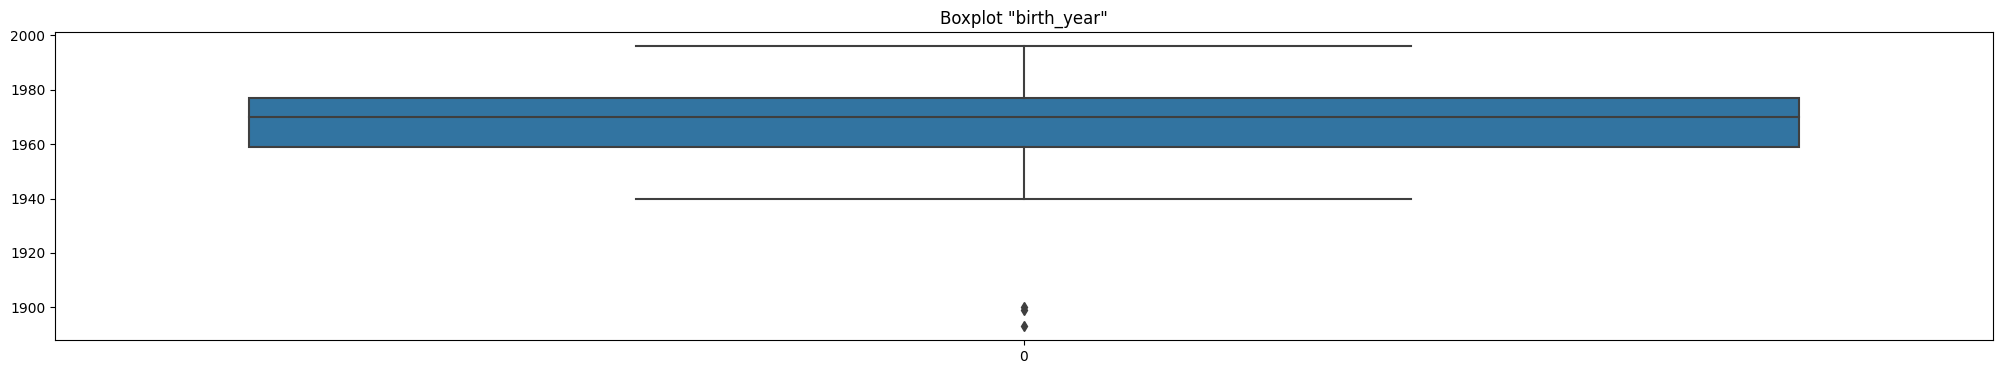

In [18]:
plt.figure(figsize=(25,4))
sns.boxplot(datos_x['birth_year'])
plt.title('Boxplot "birth_year"')
plt.show()

The boxplot shows birth data below 1900, which is not possible. For this reason, this data is deleted: 

In [19]:
#We filter by "birth_year" less than 1900 to find which observations we need to eliminate  
datos_x[datos_x['birth_year'] < 1900]

,id,birth_year,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp
513,11004,1893,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0
827,1150,1899,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,1


Now we proceed to eliminate those observations from the data set. 

In [20]:
datos_x = datos_x[datos_x['birth_year'] > 1900]

In [21]:
#We review the shape of the data set 
datos_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2237 non-null   int64  
 1   birth_year            2237 non-null   int64  
 2   wage                  2213 non-null   float64
 3   children_home         2237 non-null   int64  
 4   teens_home            2237 non-null   int64  
 5   recency               2237 non-null   int64  
 6   wine_amount           2237 non-null   int64  
 7   fruits_amount         2237 non-null   int64  
 8   meat_amount           2237 non-null   int64  
 9   fish_amount           2237 non-null   int64  
 10  sweets_amount         2237 non-null   int64  
 11  gold_amount           2237 non-null   int64  
 12  discount_purchases    2237 non-null   int64  
 13  web_purchases         2237 non-null   int64  
 14  catalog_purchases     2237 non-null   int64  
 15  store_purchases      

**Now, we change the "birth_year" column to one that indicates the age of the clients** 

In [22]:
# First, we create a column for the current year (By repeating the year 2022 2037 times, since that is the number of rows in the data set) 
datos_x["current_year"] =  np.repeat(2022,2237)

#Then, we subtract the "birth_year" column from the column we just created (current_year) to get the age 
datos_x['client_age'] = datos_x["current_year"] - datos_x["birth_year"] 

#Now, we create a dataset where we have the new variable instead of "birth_year", and we remove the "id" column  
datos_x1 = datos_x[["client_age", "wage", "children_home", "teens_home", "recency",	"wine_amount", "fruits_amount", "meat_amount",	
                    "fish_amount", "sweets_amount", "gold_amount", "discount_purchases", "web_purchases", "catalog_purchases", 
                    "store_purchases", "monthly_web_visiting", "amount_accepted_cmp"]]

datos_x1.head()

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp
0,52,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,61,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,2
2,64,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,55,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,33,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,2


We check the "client_age" variable that was just created 

In [23]:
datos_x1["client_age"].describe().T

count    2237.000000
mean       53.098346
std        11.701917
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: client_age, dtype: float64

We see that the average client_age of buyers is 53 years, with a maximum of 82 years 

**Review of the outliers for the variable "income"**


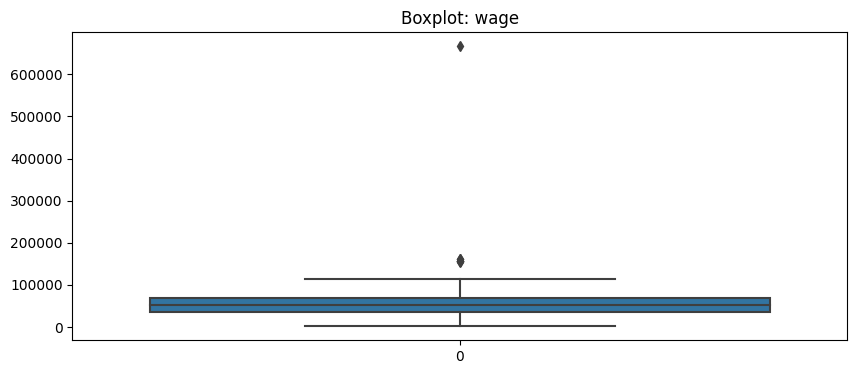

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(datos_x1['wage'])
plt.title("Boxplot: wage")
plt.show()

- Calculating the upper whisker of the boxplot 


In [25]:
# I quartile
Q1 = datos.quantile(q=0.25)
# III quartile
Q3 = datos.quantile(q=0.75) 

# interquartile range 
rango_ic = Q3 - Q1            

# upper whisker 
upper_whisker = (Q3 + 1.5*rango_ic)["wage"]
print(upper_whisker)

118350.5


In [26]:
# Once we identified the outlier observations, we can print them out. 
pd.set_option('display.max_columns', None)
datos_x1[datos_x1.wage > upper_whisker]

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp
325,45,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0
497,40,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0
527,45,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0
731,46,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0
853,51,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0
1826,47,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0
1925,73,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0
2204,49,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0


**Observations**

- There are only 8 observations that can be classified as outliers or extreme values ​​according to their behavior for the variable "wage", out of  these observations, only 3 (indices = 325, 497, 2204) have made purchases regularly in these two years, the others have made very few purchases 

Now we get a description of those extreme data and the rest to be able to compare them

In [27]:
# Outliers description 
datos_x1[datos_x1.wage > upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
client_age,8.0,49.500,10.028531,40.0,45.00,46.5,49.50,73.0
wage,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
children_home,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
teens_home,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
wine_amount,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
fruits_amount,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
meat_amount,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
fish_amount,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0
sweets_amount,8.0,1.250,0.886405,0.0,1.00,1.0,1.25,3.0


In [28]:
# Description of the rest of the data (not marked as outliers) 
datos_x1[datos_x1.wage < upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
client_age,2205.0,53.095692,11.705801,26.0,45.0,52.0,63.0,82.0
wage,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
children_home,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
teens_home,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
wine_amount,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
fruits_amount,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
meat_amount,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
fish_amount,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
sweets_amount,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0


# **Observations**

The average client_age (49 years) of the "outlier" clients is lower than the rest, and the average recency is lower (33 days compared to 49 days). The amount they invest in products is lower than that of other clients, except for what they spend on meat. "Outlier" customers buy, on average, more at discounts and in catalogs than others. Still, they make fewer purchases in the store, and their monthly visits to the web and the purchases they make through this means are lower. 
- We can remove the 5 outlier observations on the indices [527, 731, 853, 1826, 1925] as they would add no value to our analysis.


In [29]:
#Outliers are removed, observations with indices (527, 731, 853, 1826, 1925)
datos_x1.drop(index = [527, 731, 853, 1826, 1925], inplace = True) 

**Distribution of the variables**

client_age


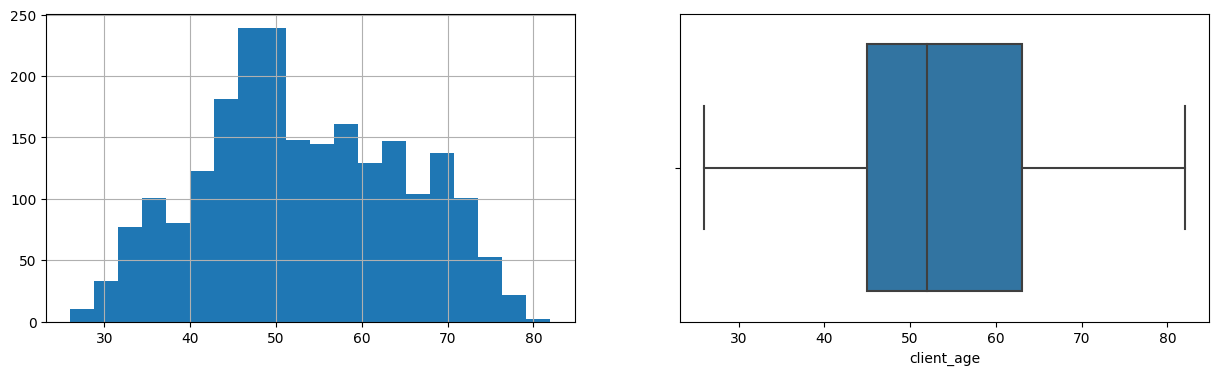

wage


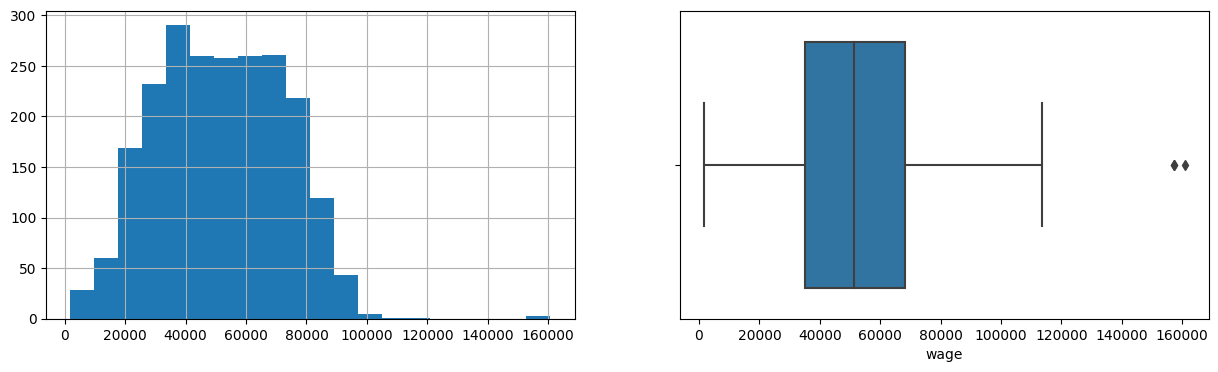

children_home


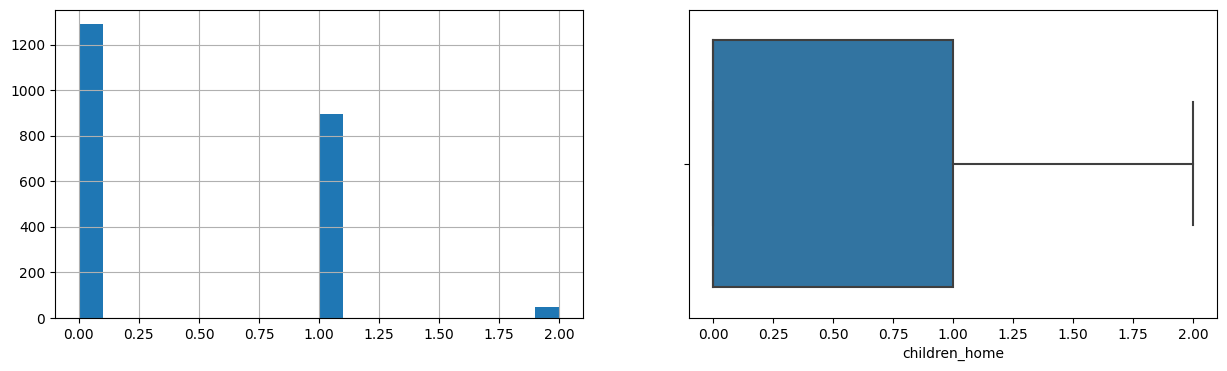

teens_home


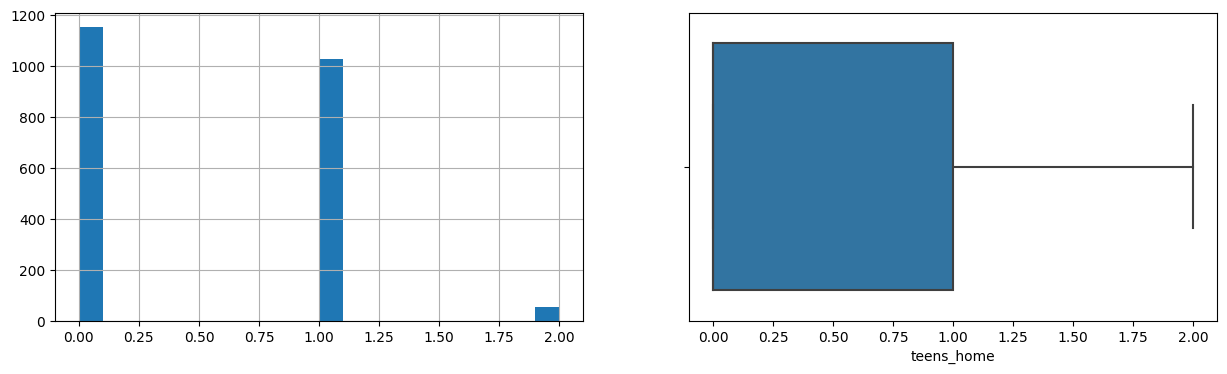

recency


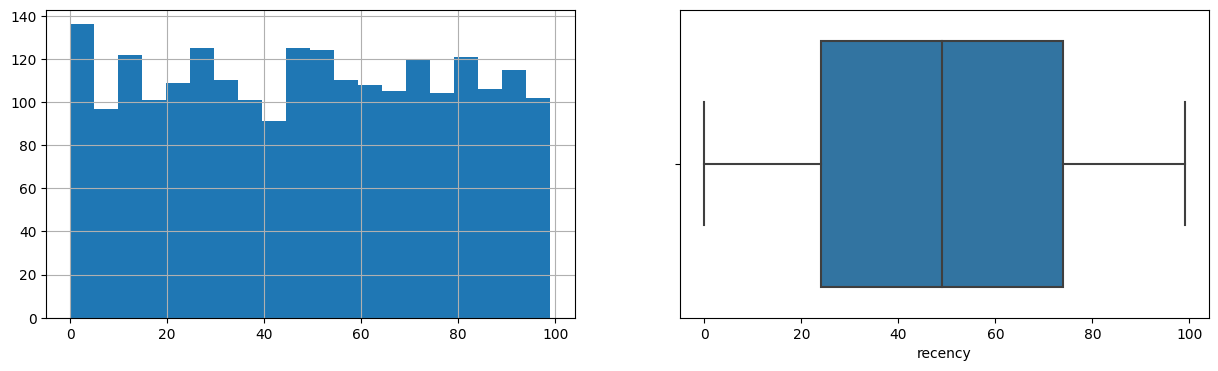

wine_amount


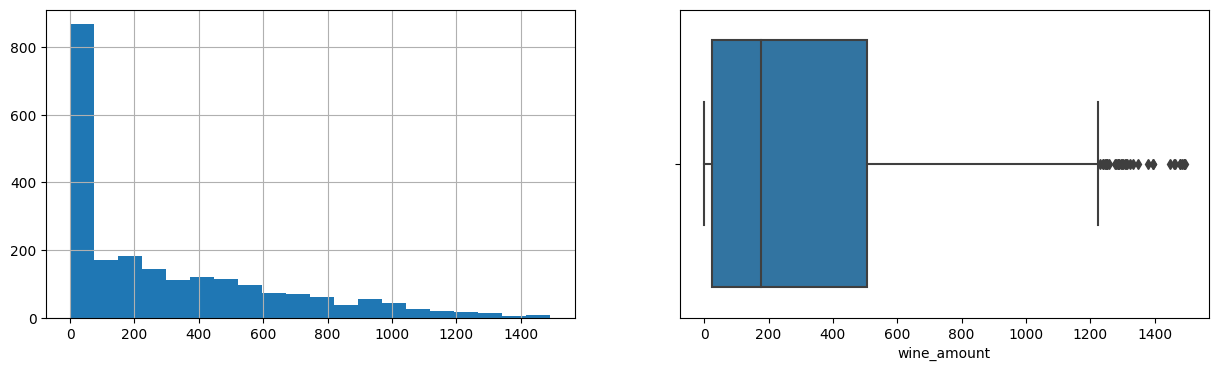

fruits_amount


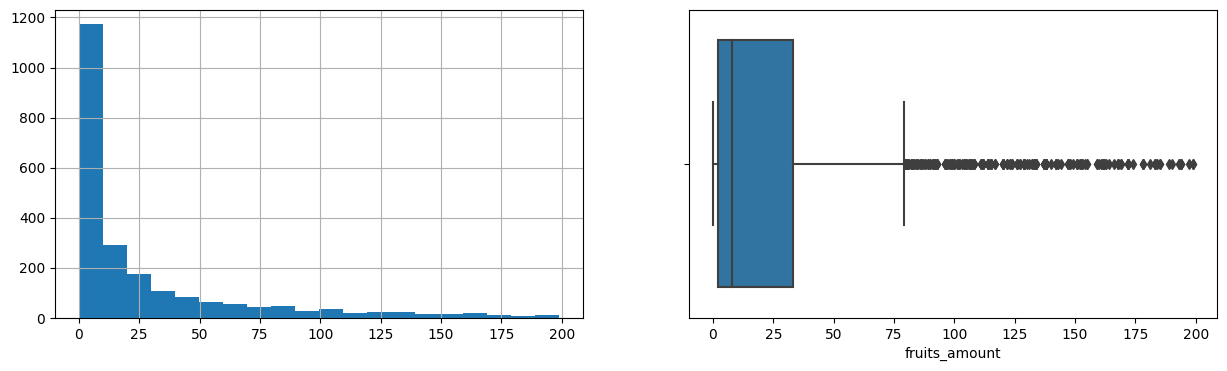

meat_amount


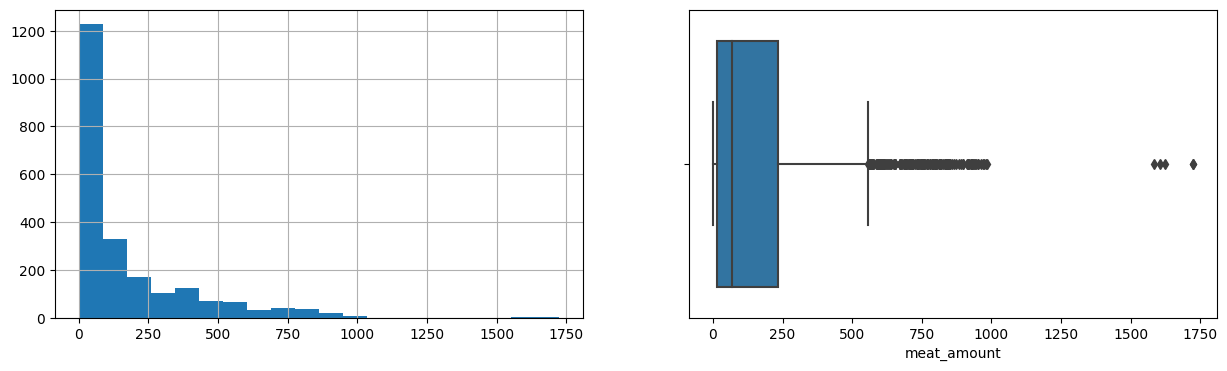

fish_amount


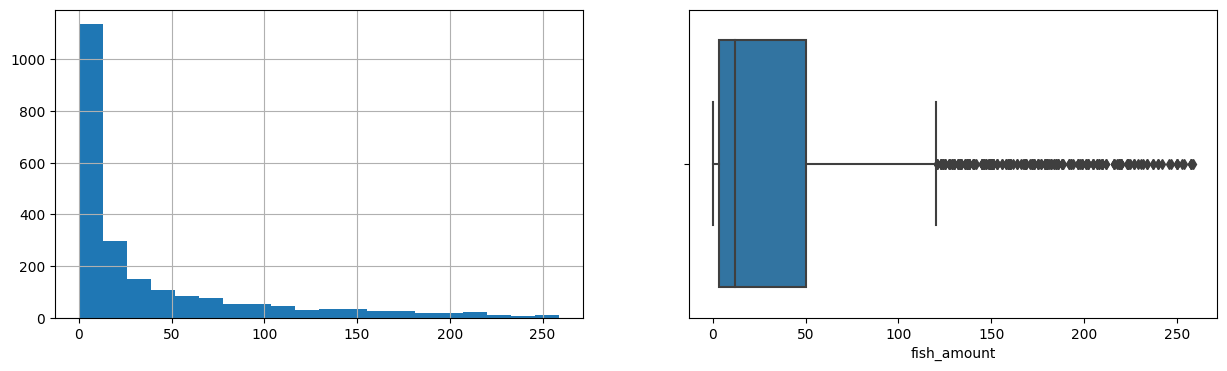

sweets_amount


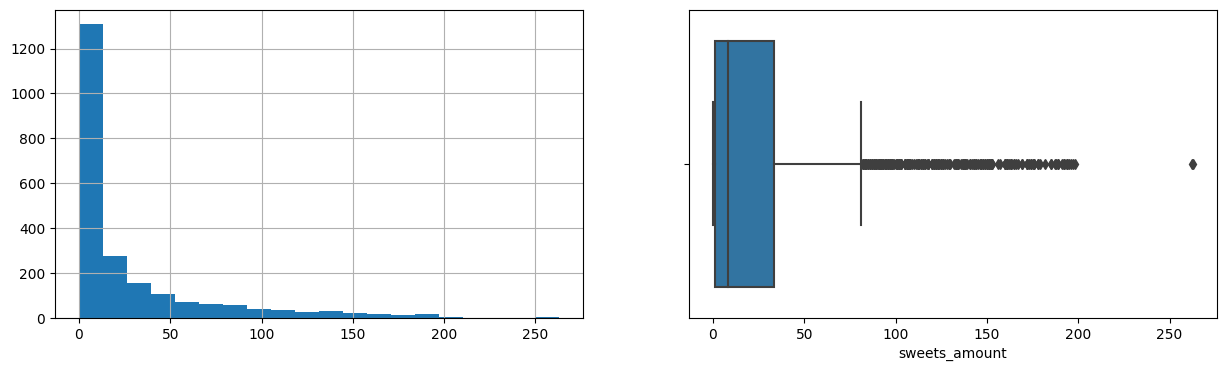

gold_amount


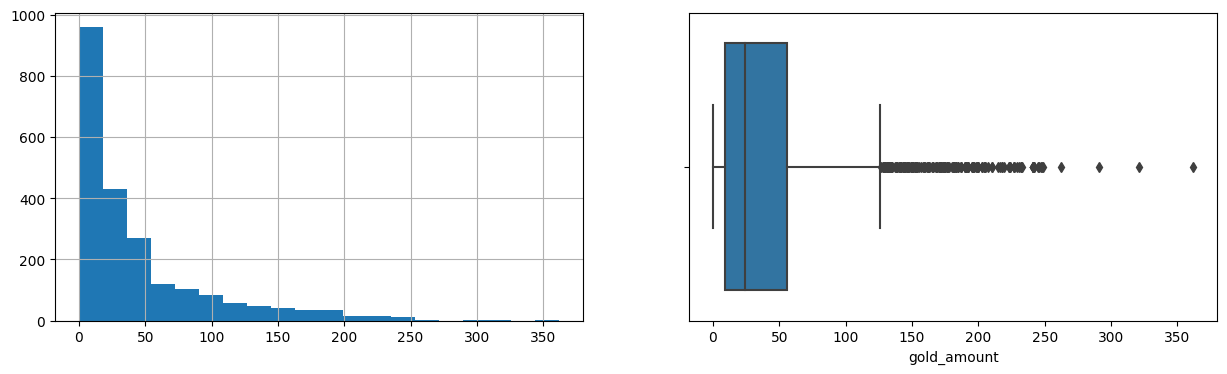

discount_purchases


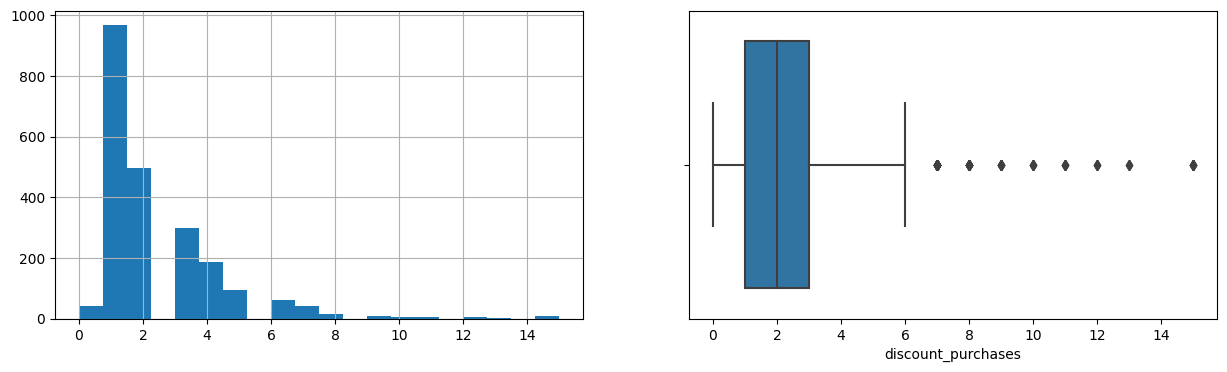

web_purchases


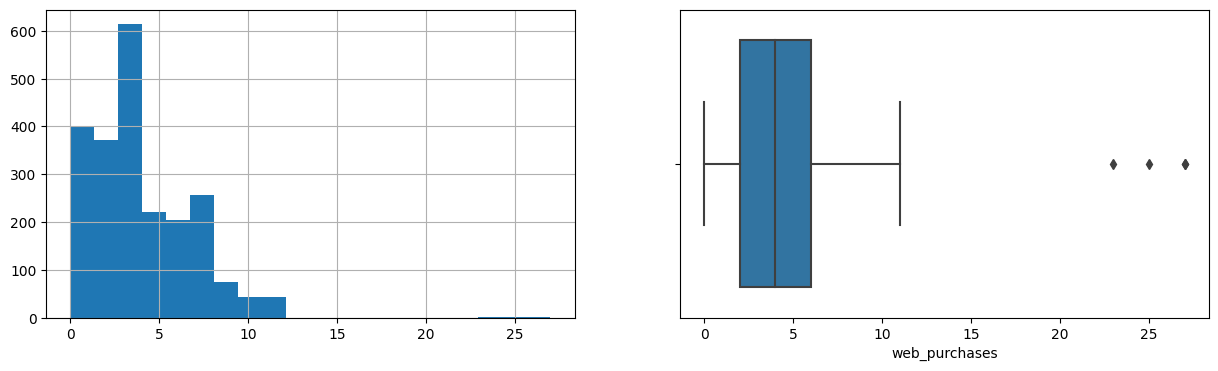

catalog_purchases


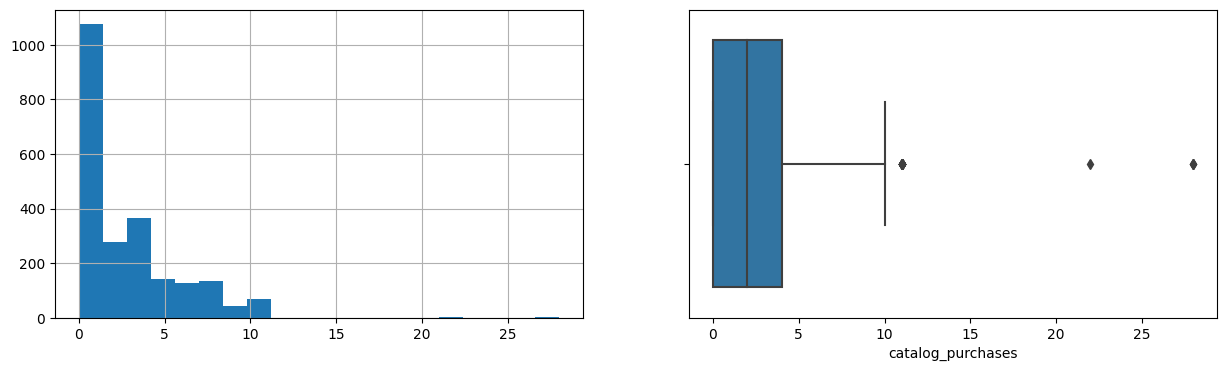

store_purchases


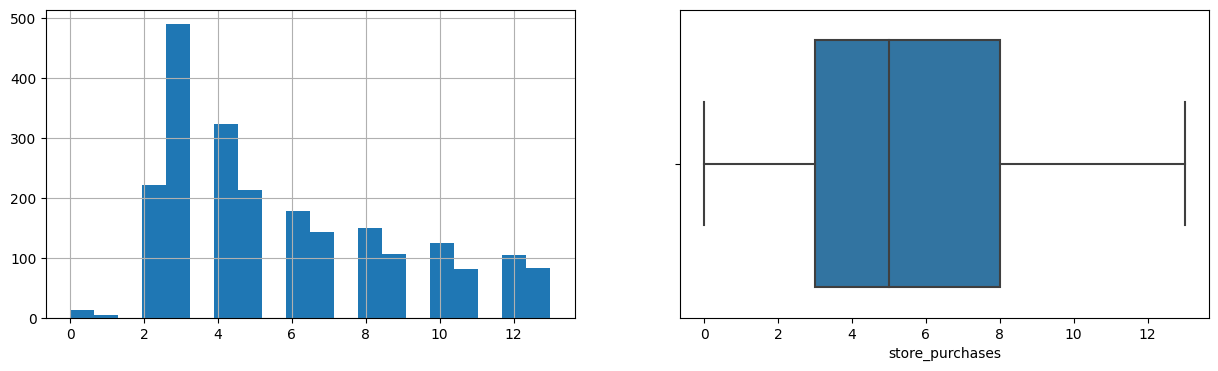

monthly_web_visiting


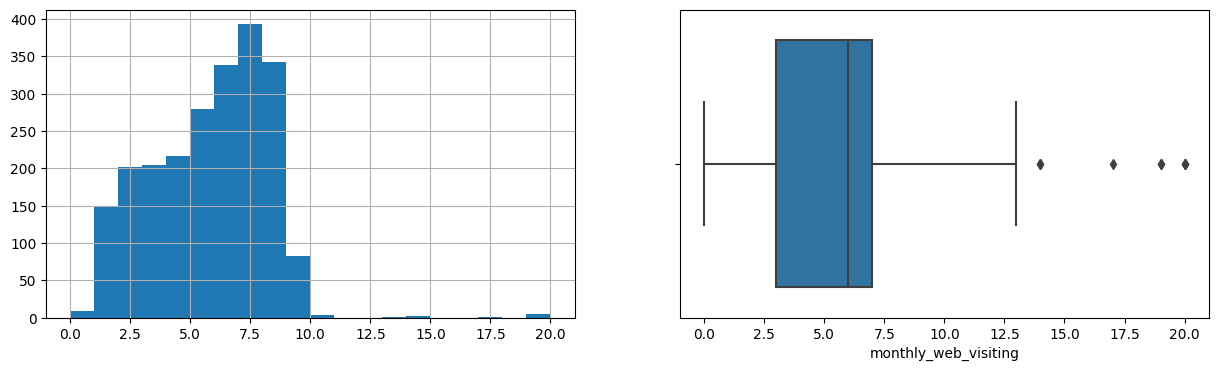

amount_accepted_cmp


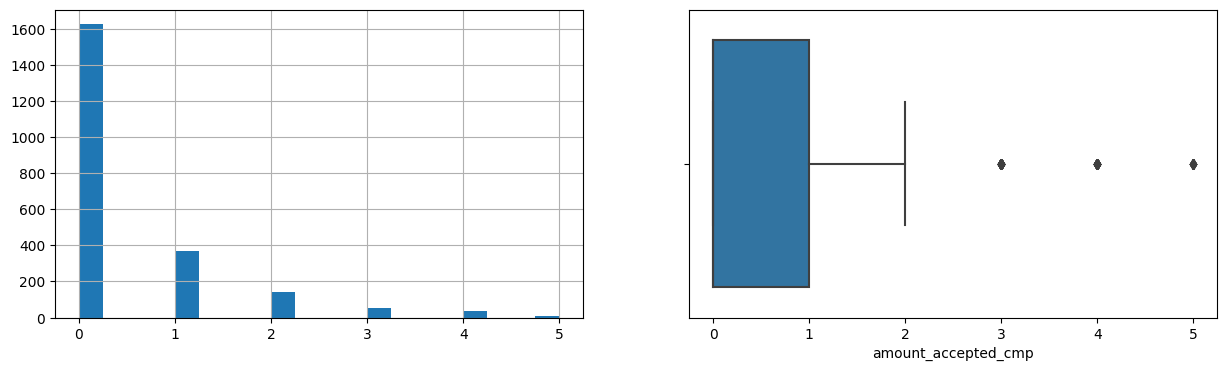

In [30]:
#Now, we are going to analyze the distributions of the different variables. 
for i in datos_x1.columns:
  print(i)
  plt.figure(figsize=(15,4))

  plt.subplot(1,2,1)
  datos_x1[i].hist(bins = 20)
  
  plt.subplot(1,2,2)
  sns.boxplot(x = datos_x1[i])
  
  plt.show()

### **Handling missing data**

We deal with missing values ​​in the "wage" variable by imputing those values with the median; since the data is skewed, the mean is not the best option. 

In [31]:
#Imputing null values ​​with the median in the variable "wage"
datos_x1['wage'].fillna(datos_x1.wage.median(), inplace = True)

### **Correlation between variables**

Now we analyze if there are connections between some of the variables and, if they exist, how strong they are. 

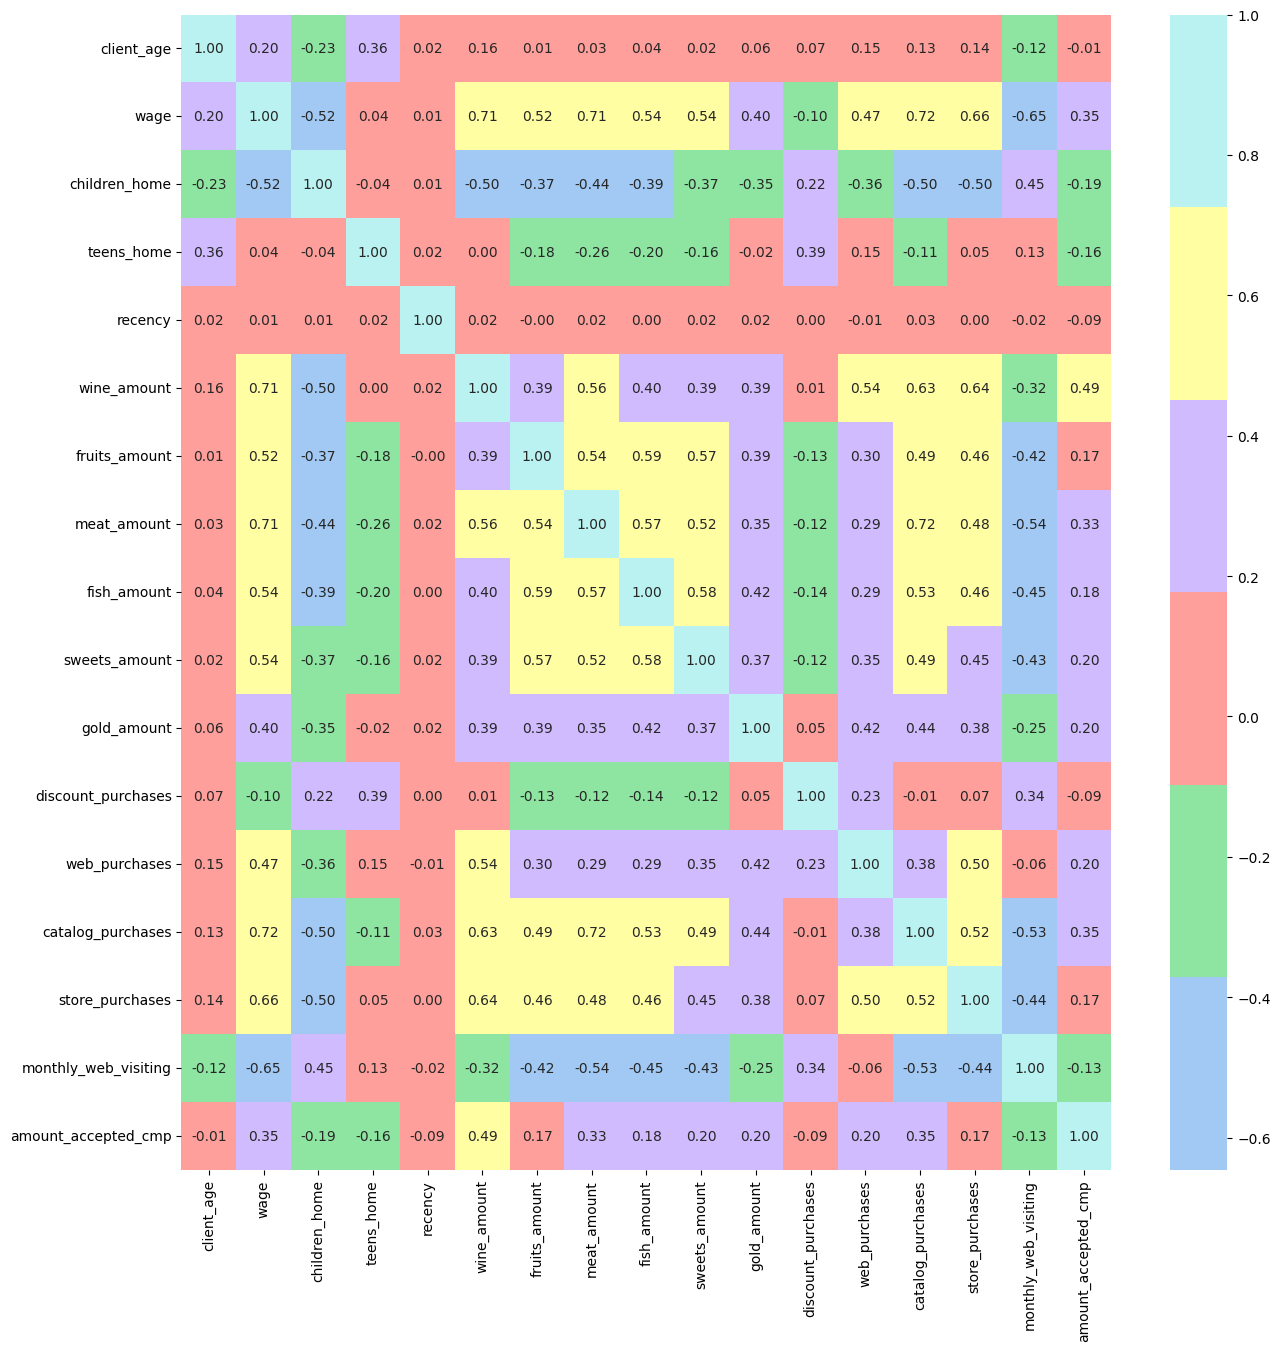

In [32]:
plt.figure(figsize = (15,15))
color = sns.color_palette("pastel6")
sns.heatmap(datos_x1.corr(), annot = True, fmt = '0.2f', cmap = color)
plt.show()

# **Observations:**


Correlated variables: variables referring to the amount spent on the different products analyzed (except for the amount of gold), the number of purchases on the web, catalog, and in the store. 


The variable "wine_amount" is positively correlated with: "wage" (0.71), with "store_purchases" (0.64), "catalog_purchases" (0.63), "meat_amount" (0.56), and "web_purchases" (0.54). 
From this, we can deduce that people who spend more significant amounts of money buying wines have greater purchasing power, they also tend to make more purchases in catalogs and through the web, and it is also related to a greater purchase of meat products. 

### Behavior according to the number of campaigns accepted

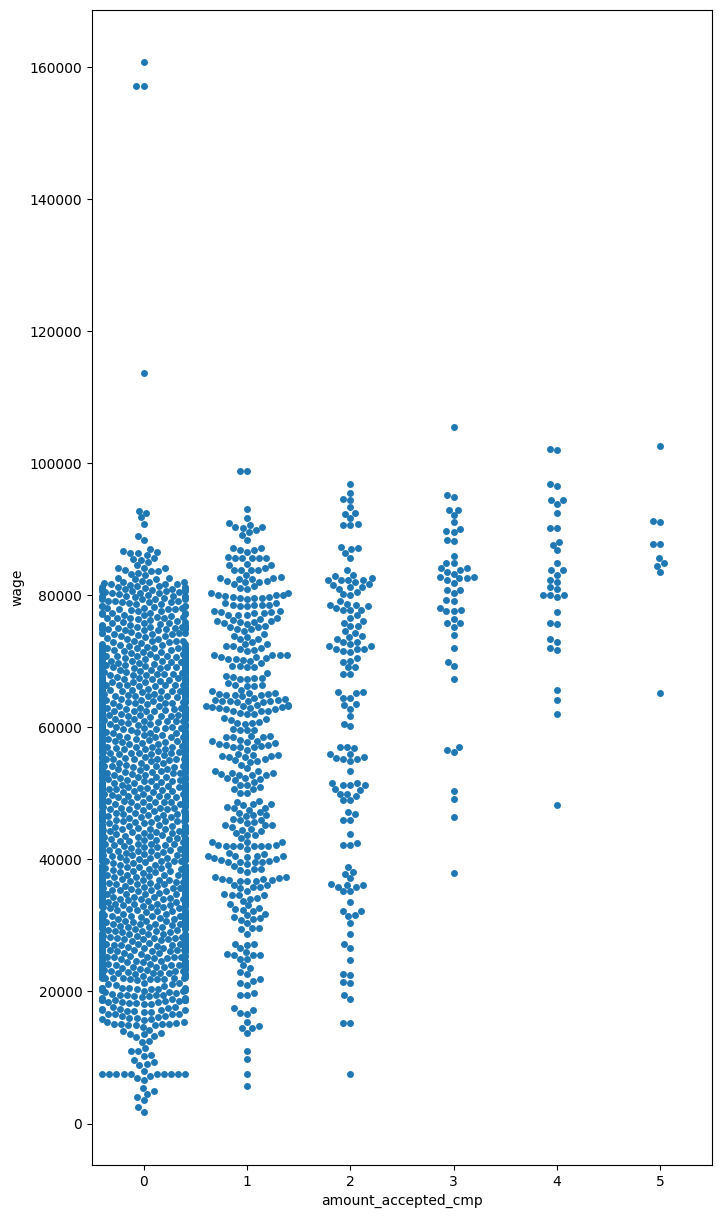

In [33]:
plt.figure(figsize=(8,15))
sns.swarmplot(x = "amount_accepted_cmp", y = "wage", data = datos_x1)
plt.show()

**Observations**



According to the previous graph, the higher the wage, the greater the number of campaigns accepted. In addition, the number of people who accept more than one or two campaigns is decreasing considerably.

# Development of clusters for classification

Now, we proceed to apply different cluster algorithms to determine which of them offers the best results and thus classify customers into groups according to their characteristics.

We start by calling the corresponding libraries for the analysis

In [34]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Para escalar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [35]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00


Initially, the data must be scaled to avoid biases in the management of variables. 

In [36]:
# We use the MinMax scaler from the scikit-learn library to avoid negative values ​​when doing the transformation 
# 1. Initialization of the scaler 
to_scale = MinMaxScaler()

# 2. We apply it to the data 
scaled_data = pd.DataFrame(to_scale.fit_transform(datos_x1), columns = datos_x1.columns)

In [37]:
# Checking the result of the transformation 
scaled_data.head()

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4


# **Clustering algorithms**

## We start with K means

In [38]:
# To start, we create a copy of the original data we are working with
copy_of_scaled_data = scaled_data.copy(deep=True)
copy_of_scaled_data_with_labels = scaled_data.copy(deep=True)

# We then make another copy of the original unscaled data to add the labels to it 
data_with_labels = datos_x1.copy(deep=True)

In [39]:
# To apply the kmeans algorithm, we call the necessary libraries 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [40]:
# To apply kmeans, it is necessary to establish the number of clusters we'd like to form. To do this, we iterate through different values ​​of k to identify the best one
# To measure the k that generates the best results, the inertia and silhouette of the resulting model are measured for each k

# To save the inertia and silhouette value of the algorithm: We create two dictionaries to store the data obtained by applying each kmeans
inertia = {}
silhouette = {}

#Generation of kmeans models for k in the range of (2:11) 
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(copy_of_scaled_data)
    etiquetas_grafico_kmeans = kmeans.predict(copy_of_scaled_data)
    inertia[k] = kmeans.inertia_
    silhouette[k] = silhouette_score(copy_of_scaled_data, etiquetas_grafico_kmeans)

- **Reviewing the inertia method**

In [41]:
#we print the results of the inertia
inertia

{2: 1044.6058198306396,
 3: 911.8506840769924,
 4: 831.0706794780886,
 5: 783.0095621776813,
 6: 745.1393673612563,
 7: 707.2616846657534,
 8: 675.2750825483931,
 9: 647.1418928766113,
 10: 625.0561749482176}

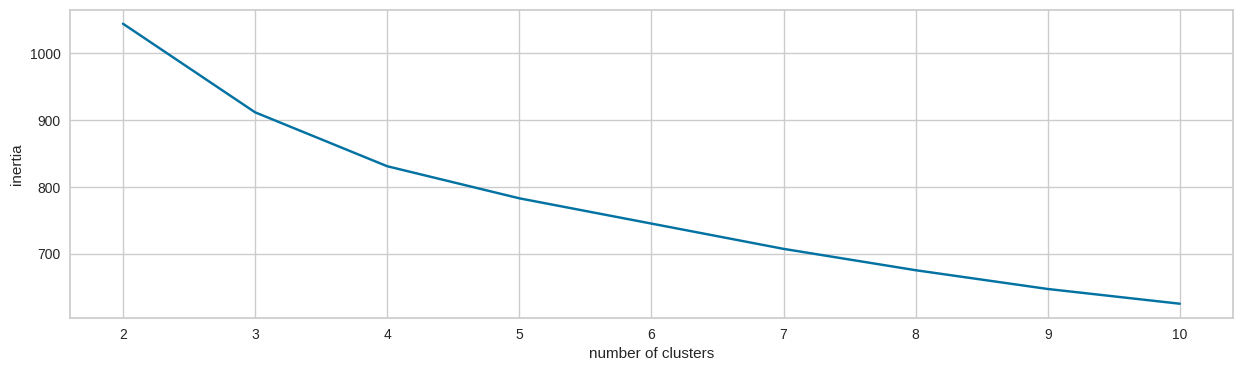

In [42]:
#Now, once we have the different values ​​of inertia, they are plotted to know the inflection point, which is a method to know the appropriate K

#Declaration of data arrays for "x" and "y" for the plot  

x = list(inertia.keys())
y = list(inertia.values())

#Plot "y" against "x": 
plt.figure(figsize=(15,4))
plt.plot(x, y,'bx-')
plt.xlabel("number of clusters")
plt.ylabel("inertia")

plt.show()

According to the graph, the inflection point is not clear, so we are going to apply the silhouette method to identify the most appropriate k

- **Reviewing the silhouette method**


We are going to graph the different silhouettes to observe their behavior in each set of clusters generated

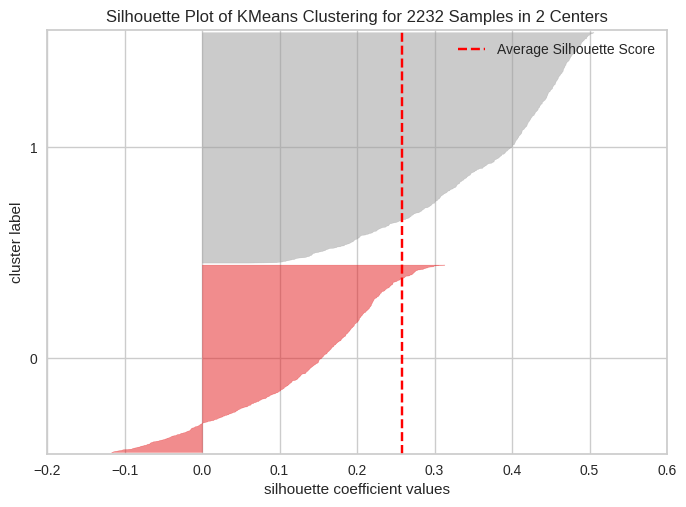

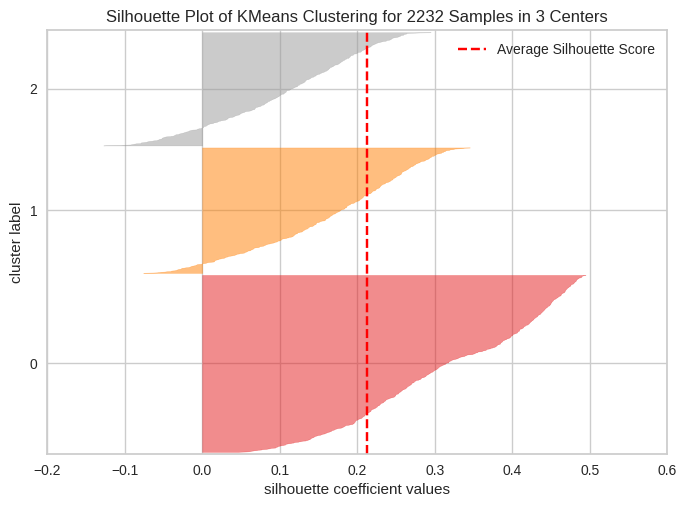

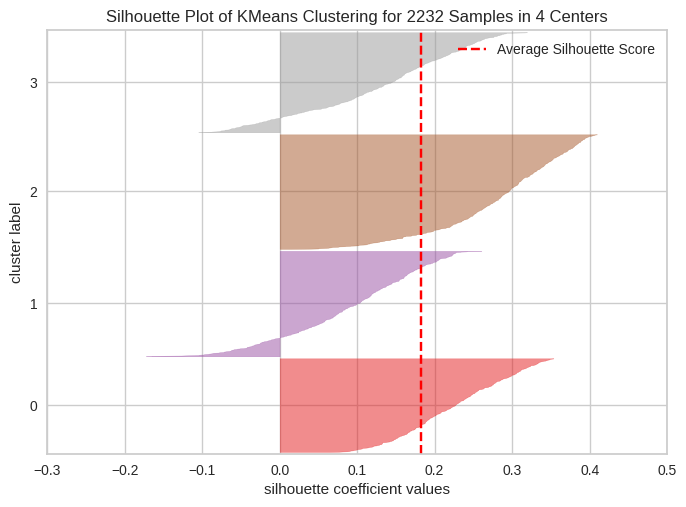

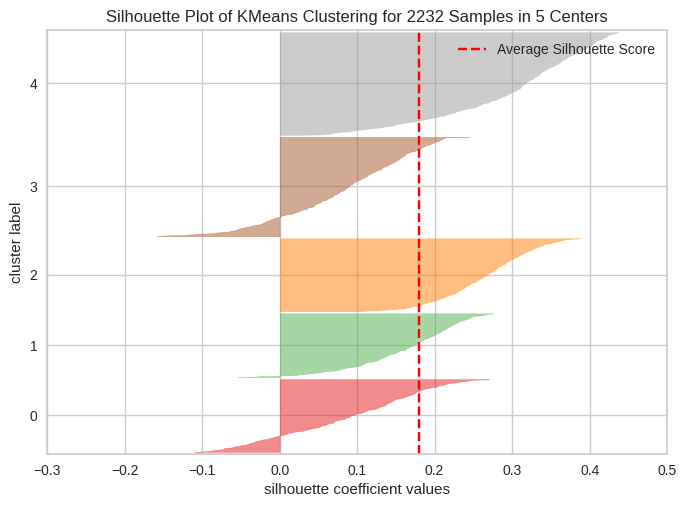

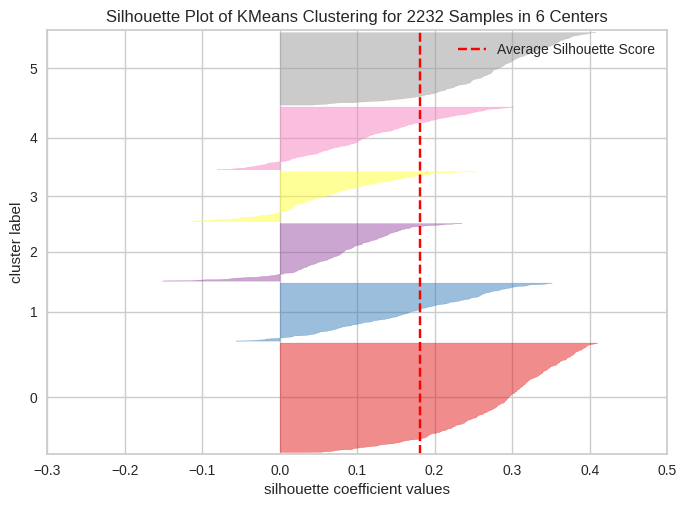

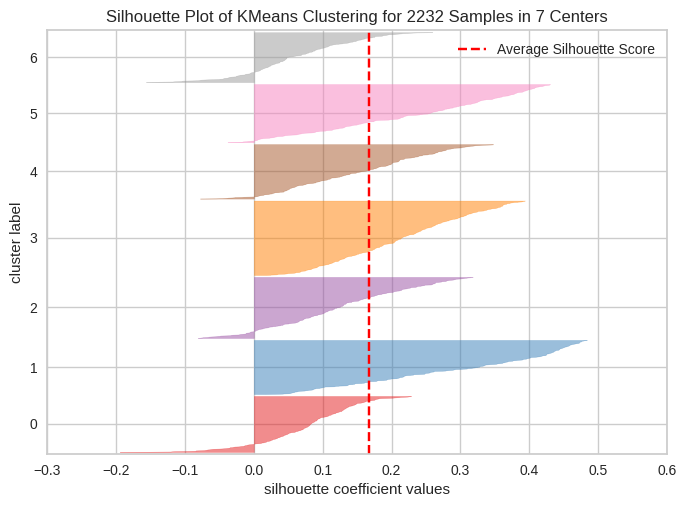

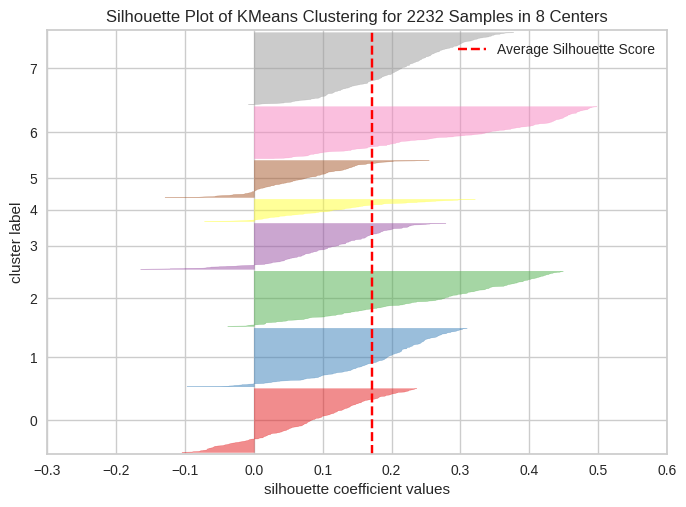

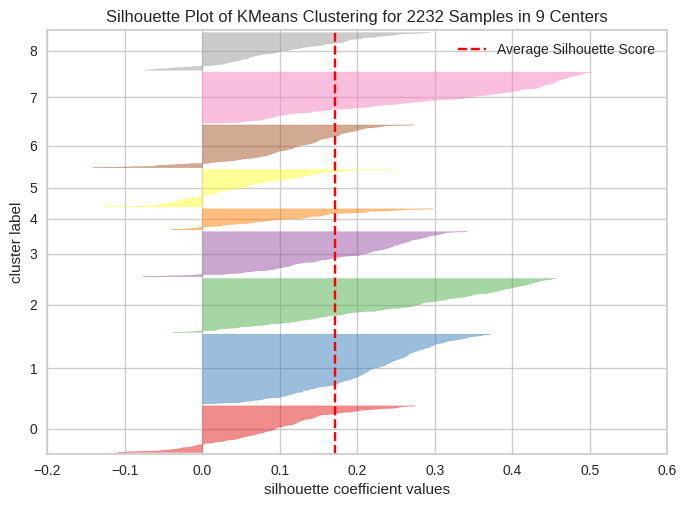

In [44]:
# Using a "for" loop to plot all the silhouettes and compare them  
for k in range(2,10):
  applied_kmeans_silhouette = KMeans(n_clusters = k, random_state = 1)
  graf_silhouette = SilhouetteVisualizer(applied_kmeans_silhouette)
  graf_silhouette.fit(copy_of_scaled_data)
  graf_silhouette.show()

According to these graphs, the best set of clusters is obtained with k = 3 since the generated clusters are of similar size and their distance from the average silhouette is similar. 

**Cluster K-means**

Now, from the algorithm, the data is classified according to the cluster

In [45]:
#Now, the kmeans algorithm is applied for k = 4, and the model is fit to the data "copy_of_scaled_data"

cluster_kmeans = KMeans(n_clusters = 3, random_state = 1)
cluster_kmeans.fit(copy_of_scaled_data)
#y_pred = kmeans.predict(copy_of_scaled_data)

KMeans(n_clusters=3, random_state=1)

In [46]:
# We include the labels indicating the cluster to which each row belongs in both the scaled and the original data 
copy_of_scaled_data_with_labels['kmeans1_labels'] = cluster_kmeans.predict(copy_of_scaled_data)
data_with_labels['kmeans1_labels'] = cluster_kmeans.labels_

# Checking the column with labels of the data set "data_with_labels" 
data_with_labels.head()

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp,kmeans1_labels
0,52,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,2
1,61,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,2,1
2,64,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,1
3,55,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,33,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,2,0


In [47]:
# Reviewing the number of rows or data containdes at each cluster 
copy_of_scaled_data_with_labels["kmeans1_labels"].value_counts() 

0    950
1    674
2    608
Name: kmeans1_labels, dtype: int64

In [48]:
clusters_kmed = cluster_kmeans.fit_predict(copy_of_scaled_data)
silhouette_kmeans = round(silhouette_score(copy_of_scaled_data, clusters_kmed),2)
print(silhouette_kmeans)

0.21


All the clusters have a very similar number of points, which makes sense based on what was observed in the silhouette plot.

**Analyzing each cluster according to each variable** 

In [54]:
# Creating a list with data columns' names  
cols_clusters = list(scaled_data.columns)

# Creating a function to plot the clusters for the different algorithmsdef plot_clusters(cols_clusters, data_with_labels, labels_names):
def plot_clusters(cols_clusters, data_with_labels, labels_names): 
  plt.figure(figsize = (25, 20))
  for i, variable in enumerate(cols_clusters):
    if i == 16:
      break
    #chart position
    plt.subplot(6, 3, i + 1)
    #boxplot
    sns.boxplot(y = data_with_labels[variable], x = data_with_labels[labels_names])
    plt.tight_layout()
    plt.title(variable)
  plt.show()

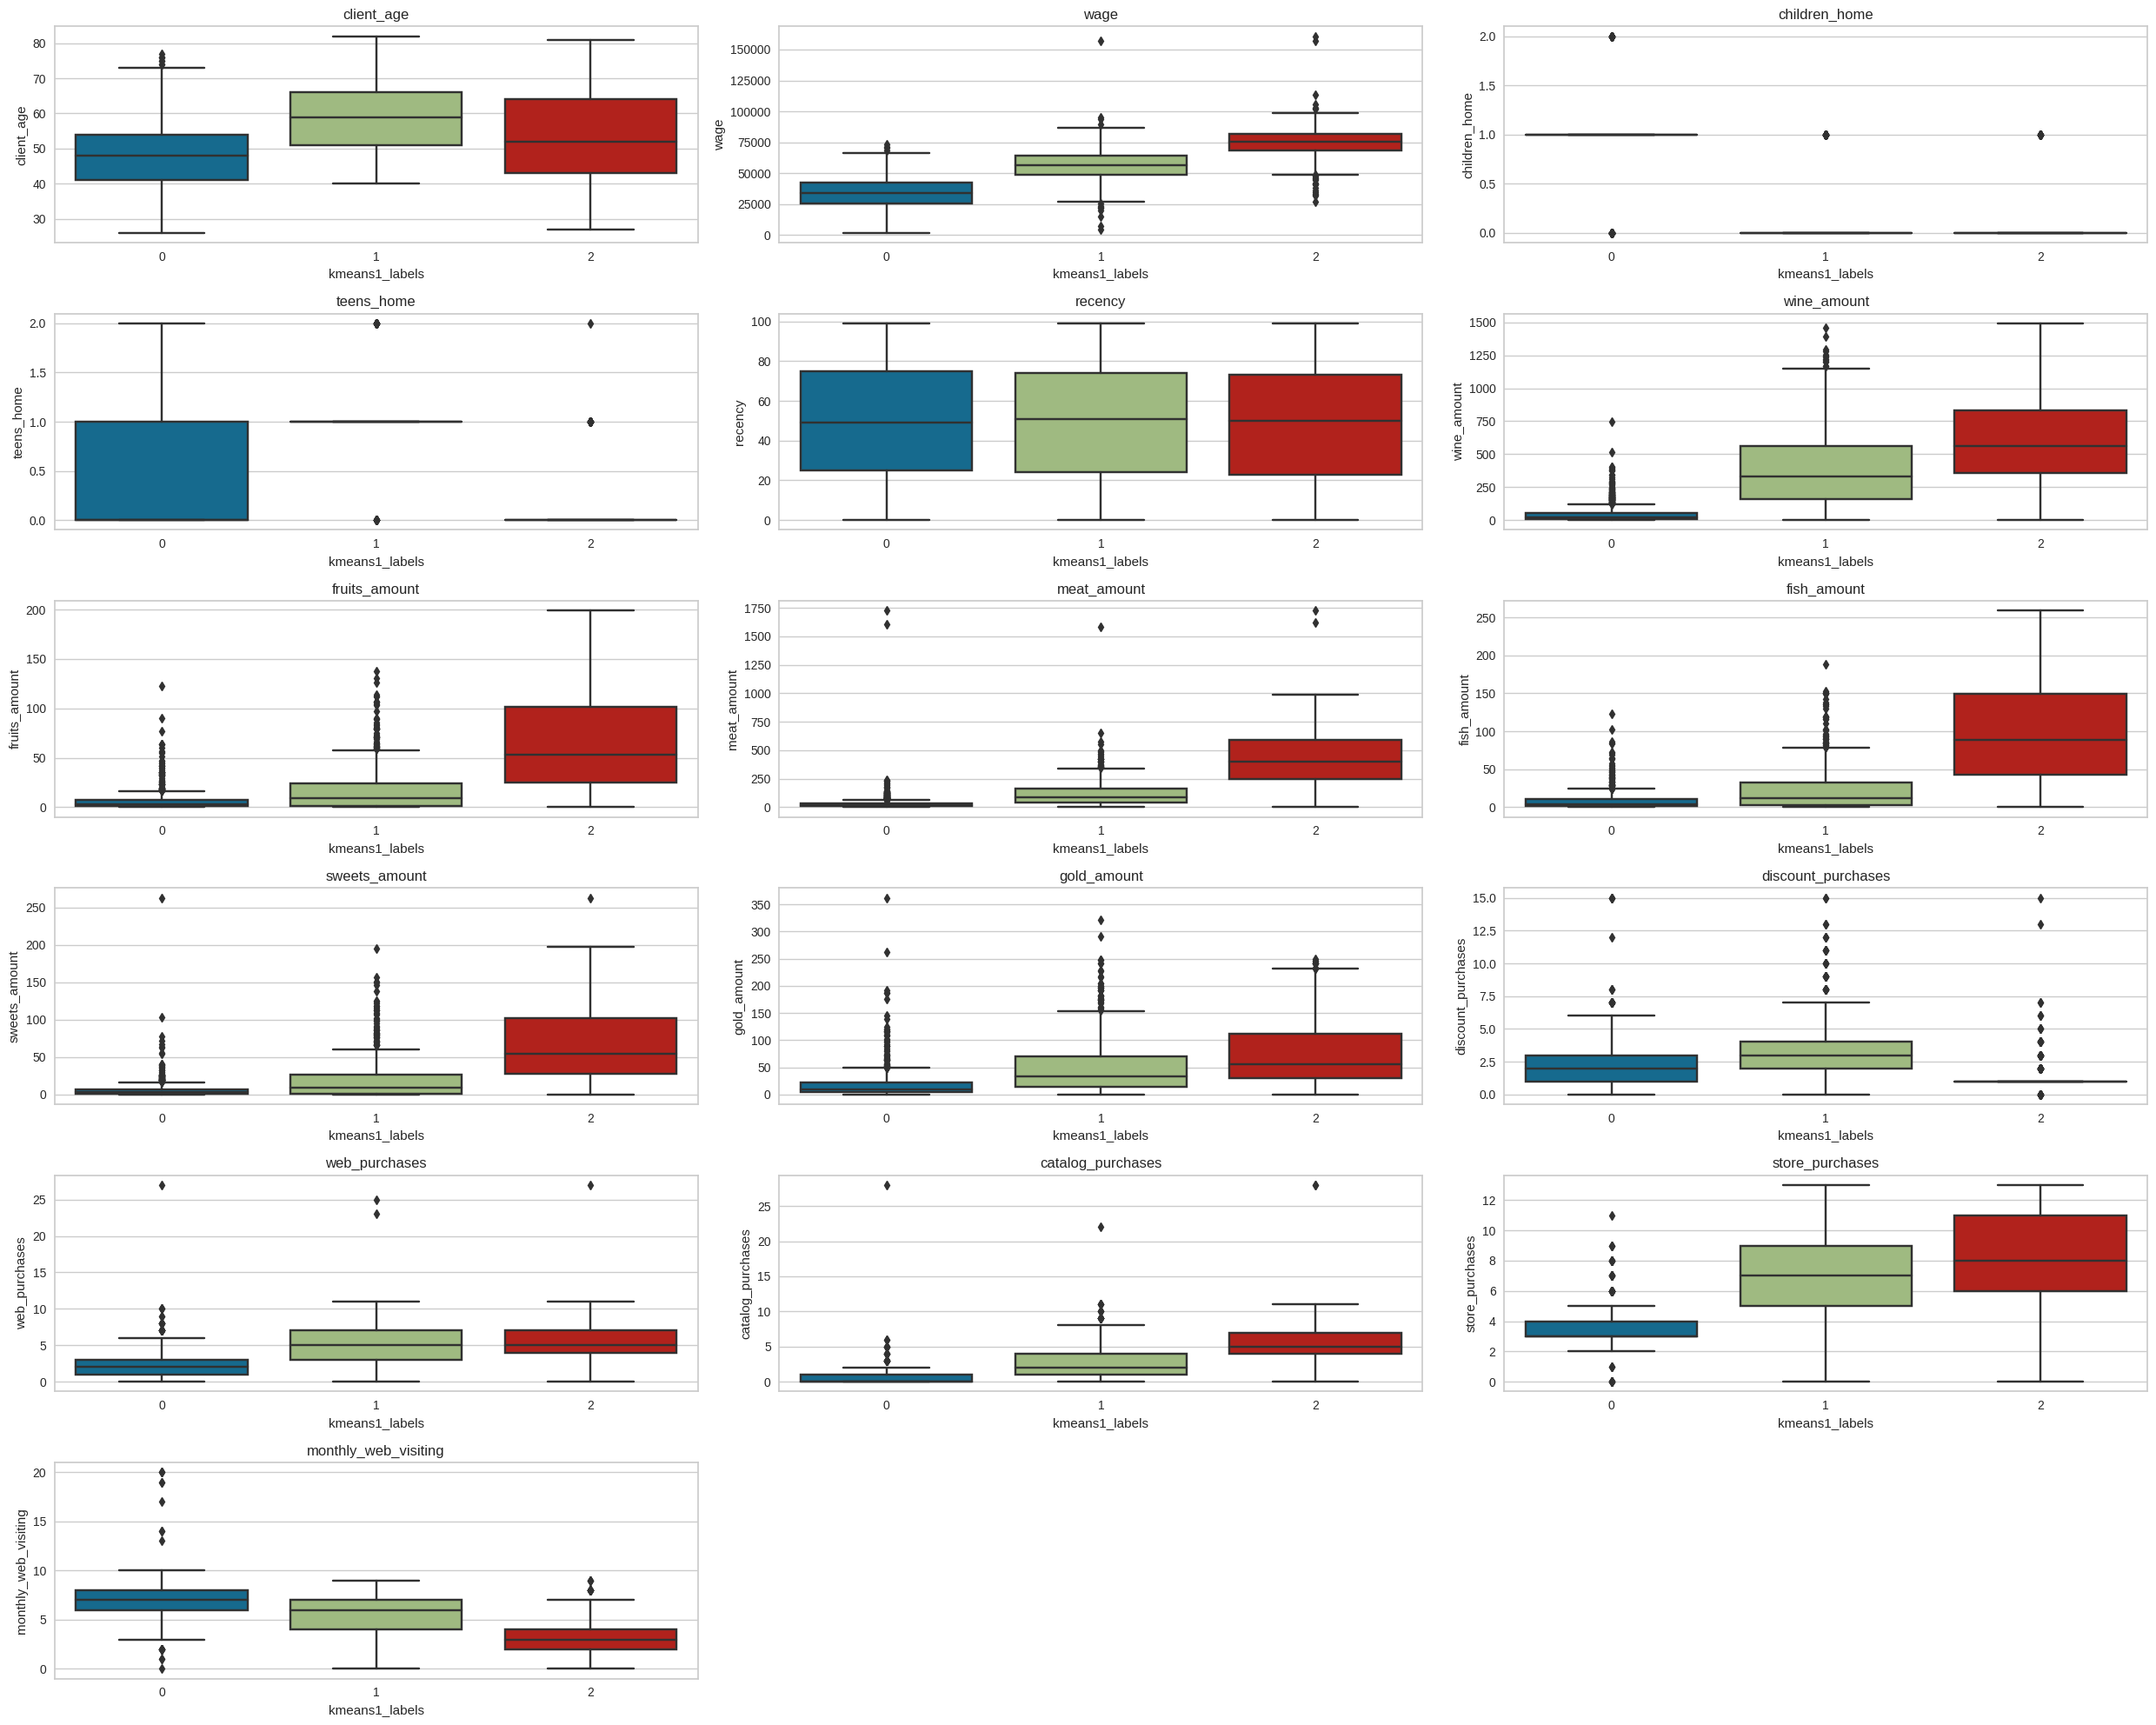

In [55]:
# Plotting a boxplot for each cluster using the function just created 
plot_clusters(cols_clusters, data_with_labels, "kmeans1_labels")



## **Hierarchical Cluster**

**Dendrogram**:

Now we apply the dendrogram for the hierarchical cluster 

In [56]:
# Importing the libraries 
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

It is also necessary to know the number of clusters to be generated to apply the hierarchical clustering. Therefore, we first use a dendrogram, which graphically shows how the clusters form according to the data. 

For this, we'll generate various dendrograms, each with a different  "linkage" method, to define which is more effective for developing the model. The "linkage" illustrates how the algorithm measures the distances between the points to form the clusters. 

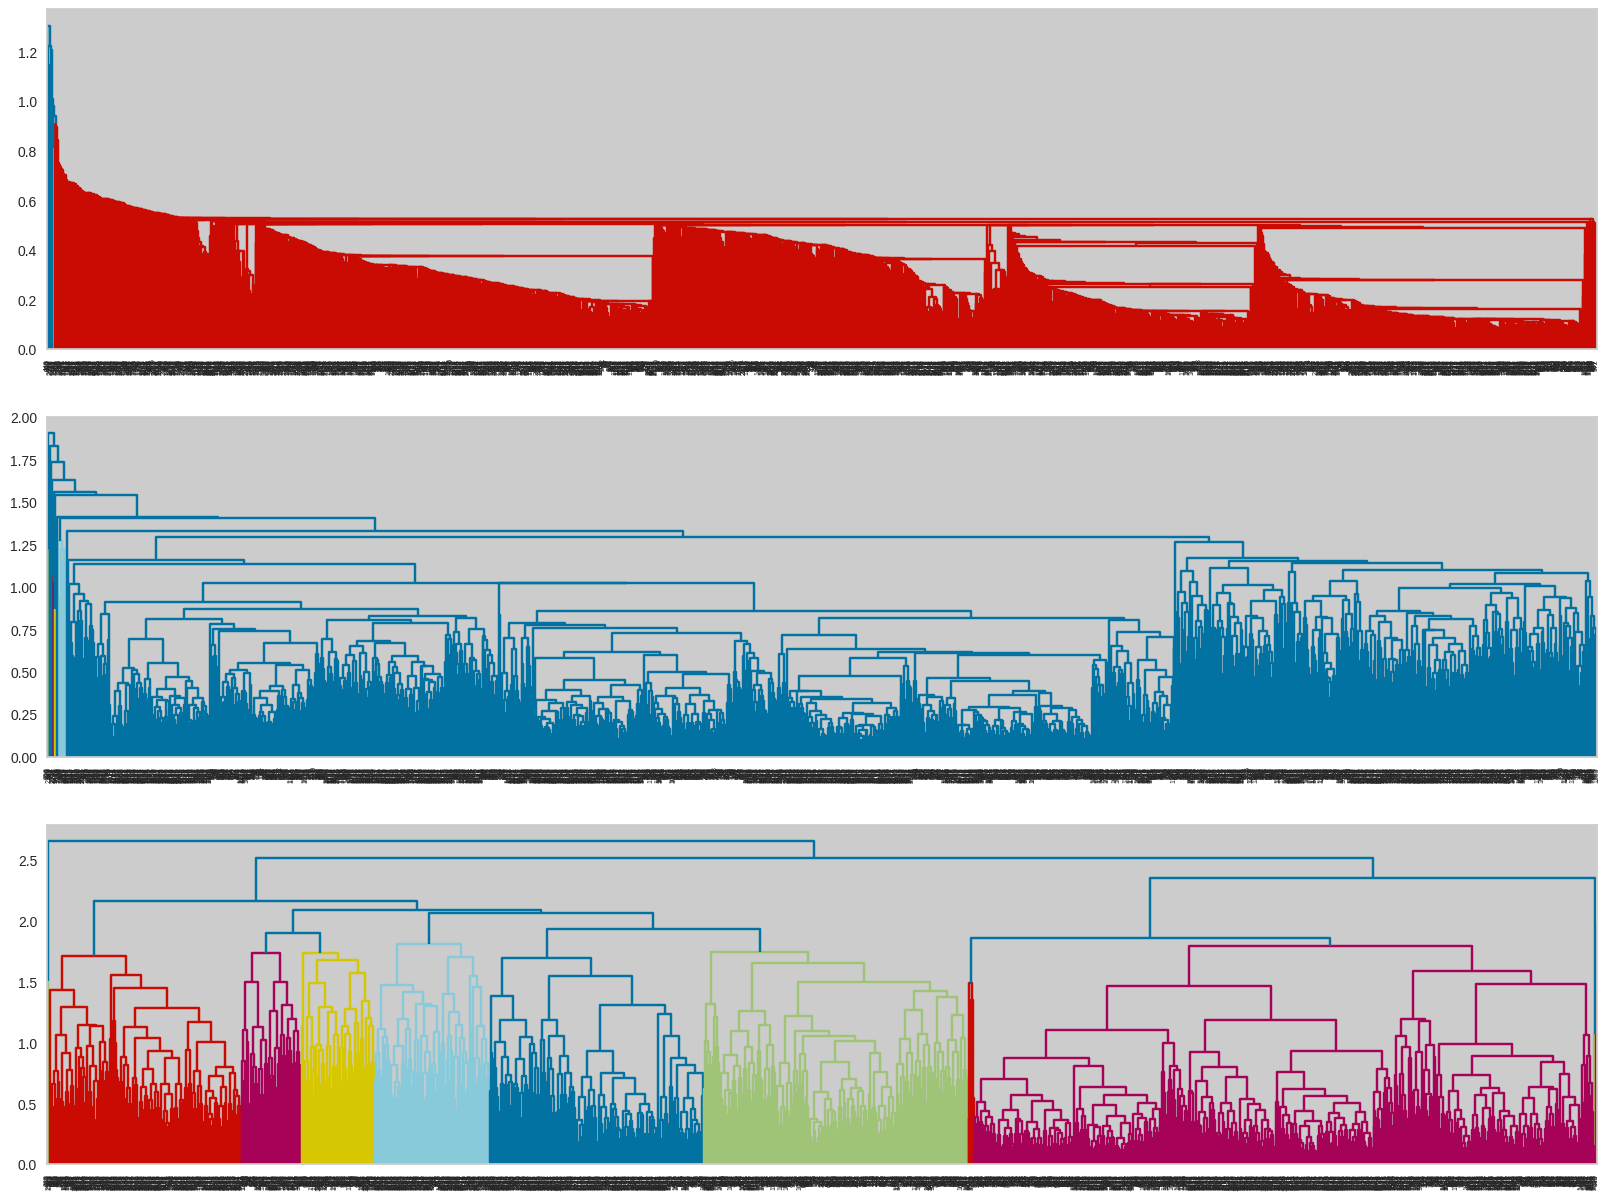

In [58]:
# Checking three different linkage methods: "single", "average", "complete" 

# Creating a list with the names of the methods we'll be testing 
methods_linkage1 = ["single", "average", "complete"]

# Plotting the result of the methods using a "for": 
figura, axis = plt.subplots(len(methods_linkage1), 1, figsize=(20, 15))

for i, method in enumerate(methods_linkage1):
   dendrogram(linkage(copy_of_scaled_data, metric = 'euclidean', method = method), ax = axis[i]);
  

Out of the tested methods, the best one results from the linkage = "complete" 

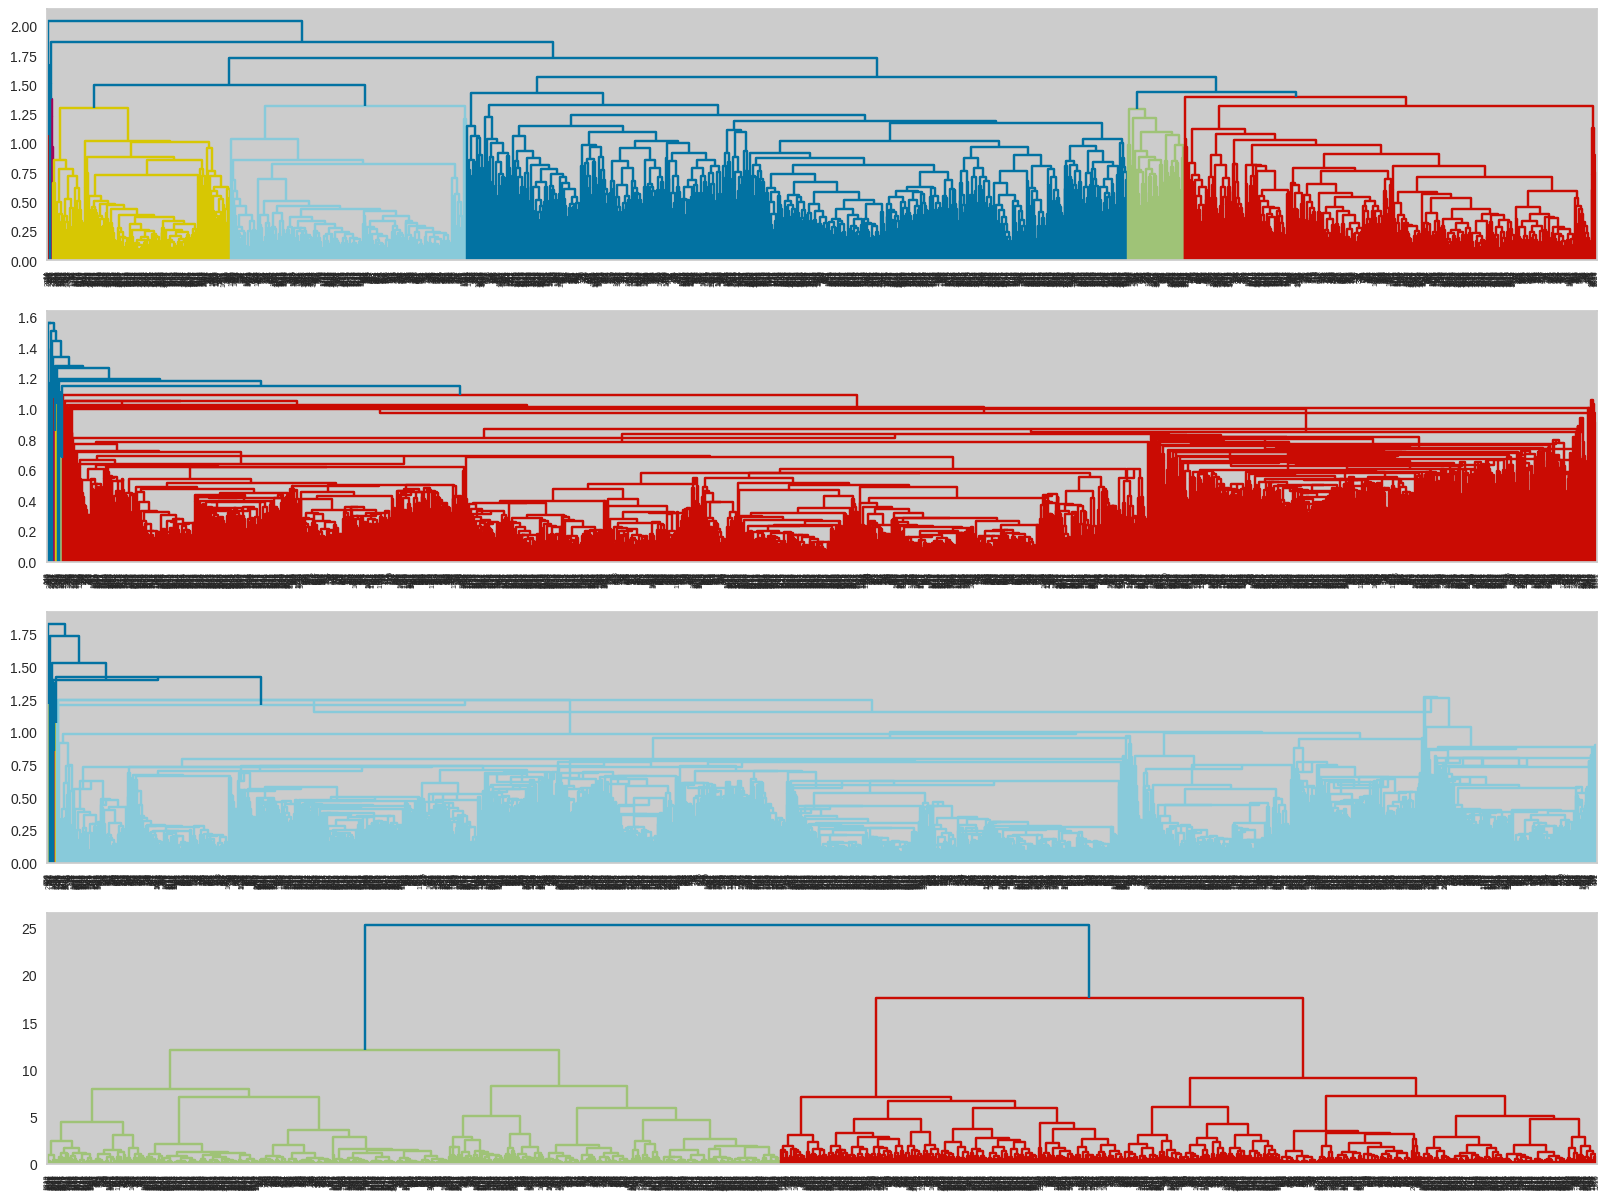

In [59]:
# checking the other four linkage methods: "weighted", "centroid", "median", "ward" 

#list with missing methods
methods_linkage2 = ["weighted", "centroid", "median", "ward"]

# methods plots 
figura, axis = plt.subplots(len(methods_linkage2), 1, figsize = (20, 15))

for i, method in enumerate(methods_linkage2):
   dendrogram(linkage(copy_of_scaled_data, metric = 'euclidean', method = method), ax = axis[i]);

The ward linkage offers the best option: the clusters are well separated, which is verified through the vertical lengths.
This algorithm requires Euclidean distance.

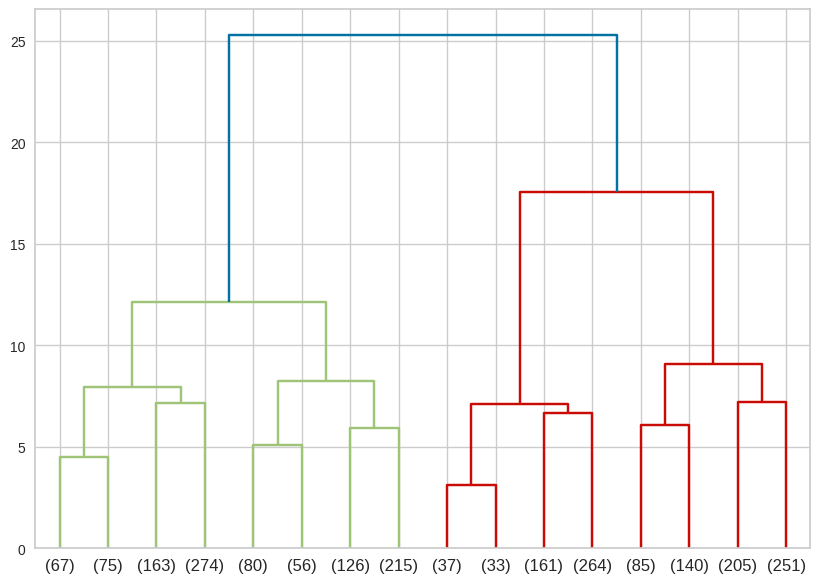

In [60]:
# Plotting the top section of the dendrogram to determine how many clusters should be generated in this case 

#1. Applying "ward" to the data
linkage_ward = ward(copy_of_scaled_data)

# 2. Applying the dendrogram of the similarities of hierarchical groups 
plt.figure(figsize=(10, 7))
dendrogram(linkage_ward, truncate_mode = 'level', p = 3)

plt.show()


According to the dendrogram, there are 3 clusters. We then apply  the hierarchical cluster type with the suggested number of clusters.

**Hierarchical Agglomerative Cluster** 

Once the number of clusters is defined, we apply the hierarchical cluster algorithm 

In [61]:
# Importing the clustering method from the scikit-learn library 
from sklearn.cluster import AgglomerativeClustering

In [62]:
# initializing the clustering algorithm 
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

# Applying the algorithm to the data so that each row of data is classified into a cluster
hierarchical_cluster.fit(copy_of_scaled_data) 

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [63]:
#Adding labels to the data to define which cluster they belong to
copy_of_scaled_data_with_labels["hierarchical_labels"] = hierarchical_cluster.labels_
data_with_labels["hierarchical_labels"] = hierarchical_cluster.labels_

copy_of_scaled_data_with_labels.head()

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp,kmeans1_labels,hierarchical_labels
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2,2,2
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4,1,2
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0,1,1
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0,0,0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4,0,0


In [64]:
# Checking the amount of data contained in each cluster 
copy_of_scaled_data_with_labels["hierarchical_labels"].value_counts()

0    1056
1     681
2     495
Name: hierarchical_labels, dtype: int64

In [65]:
clusters_j = hierarchical_cluster.fit_predict(copy_of_scaled_data)
hierarchical_silhouette = round(silhouette_score(copy_of_scaled_data, clusters_j),2)
print(hierarchical_silhouette)

0.21


The clusters obtained are similar to each other in terms of amount of data.

Each cluster is plotted based on the different variables to analyze their behavior.

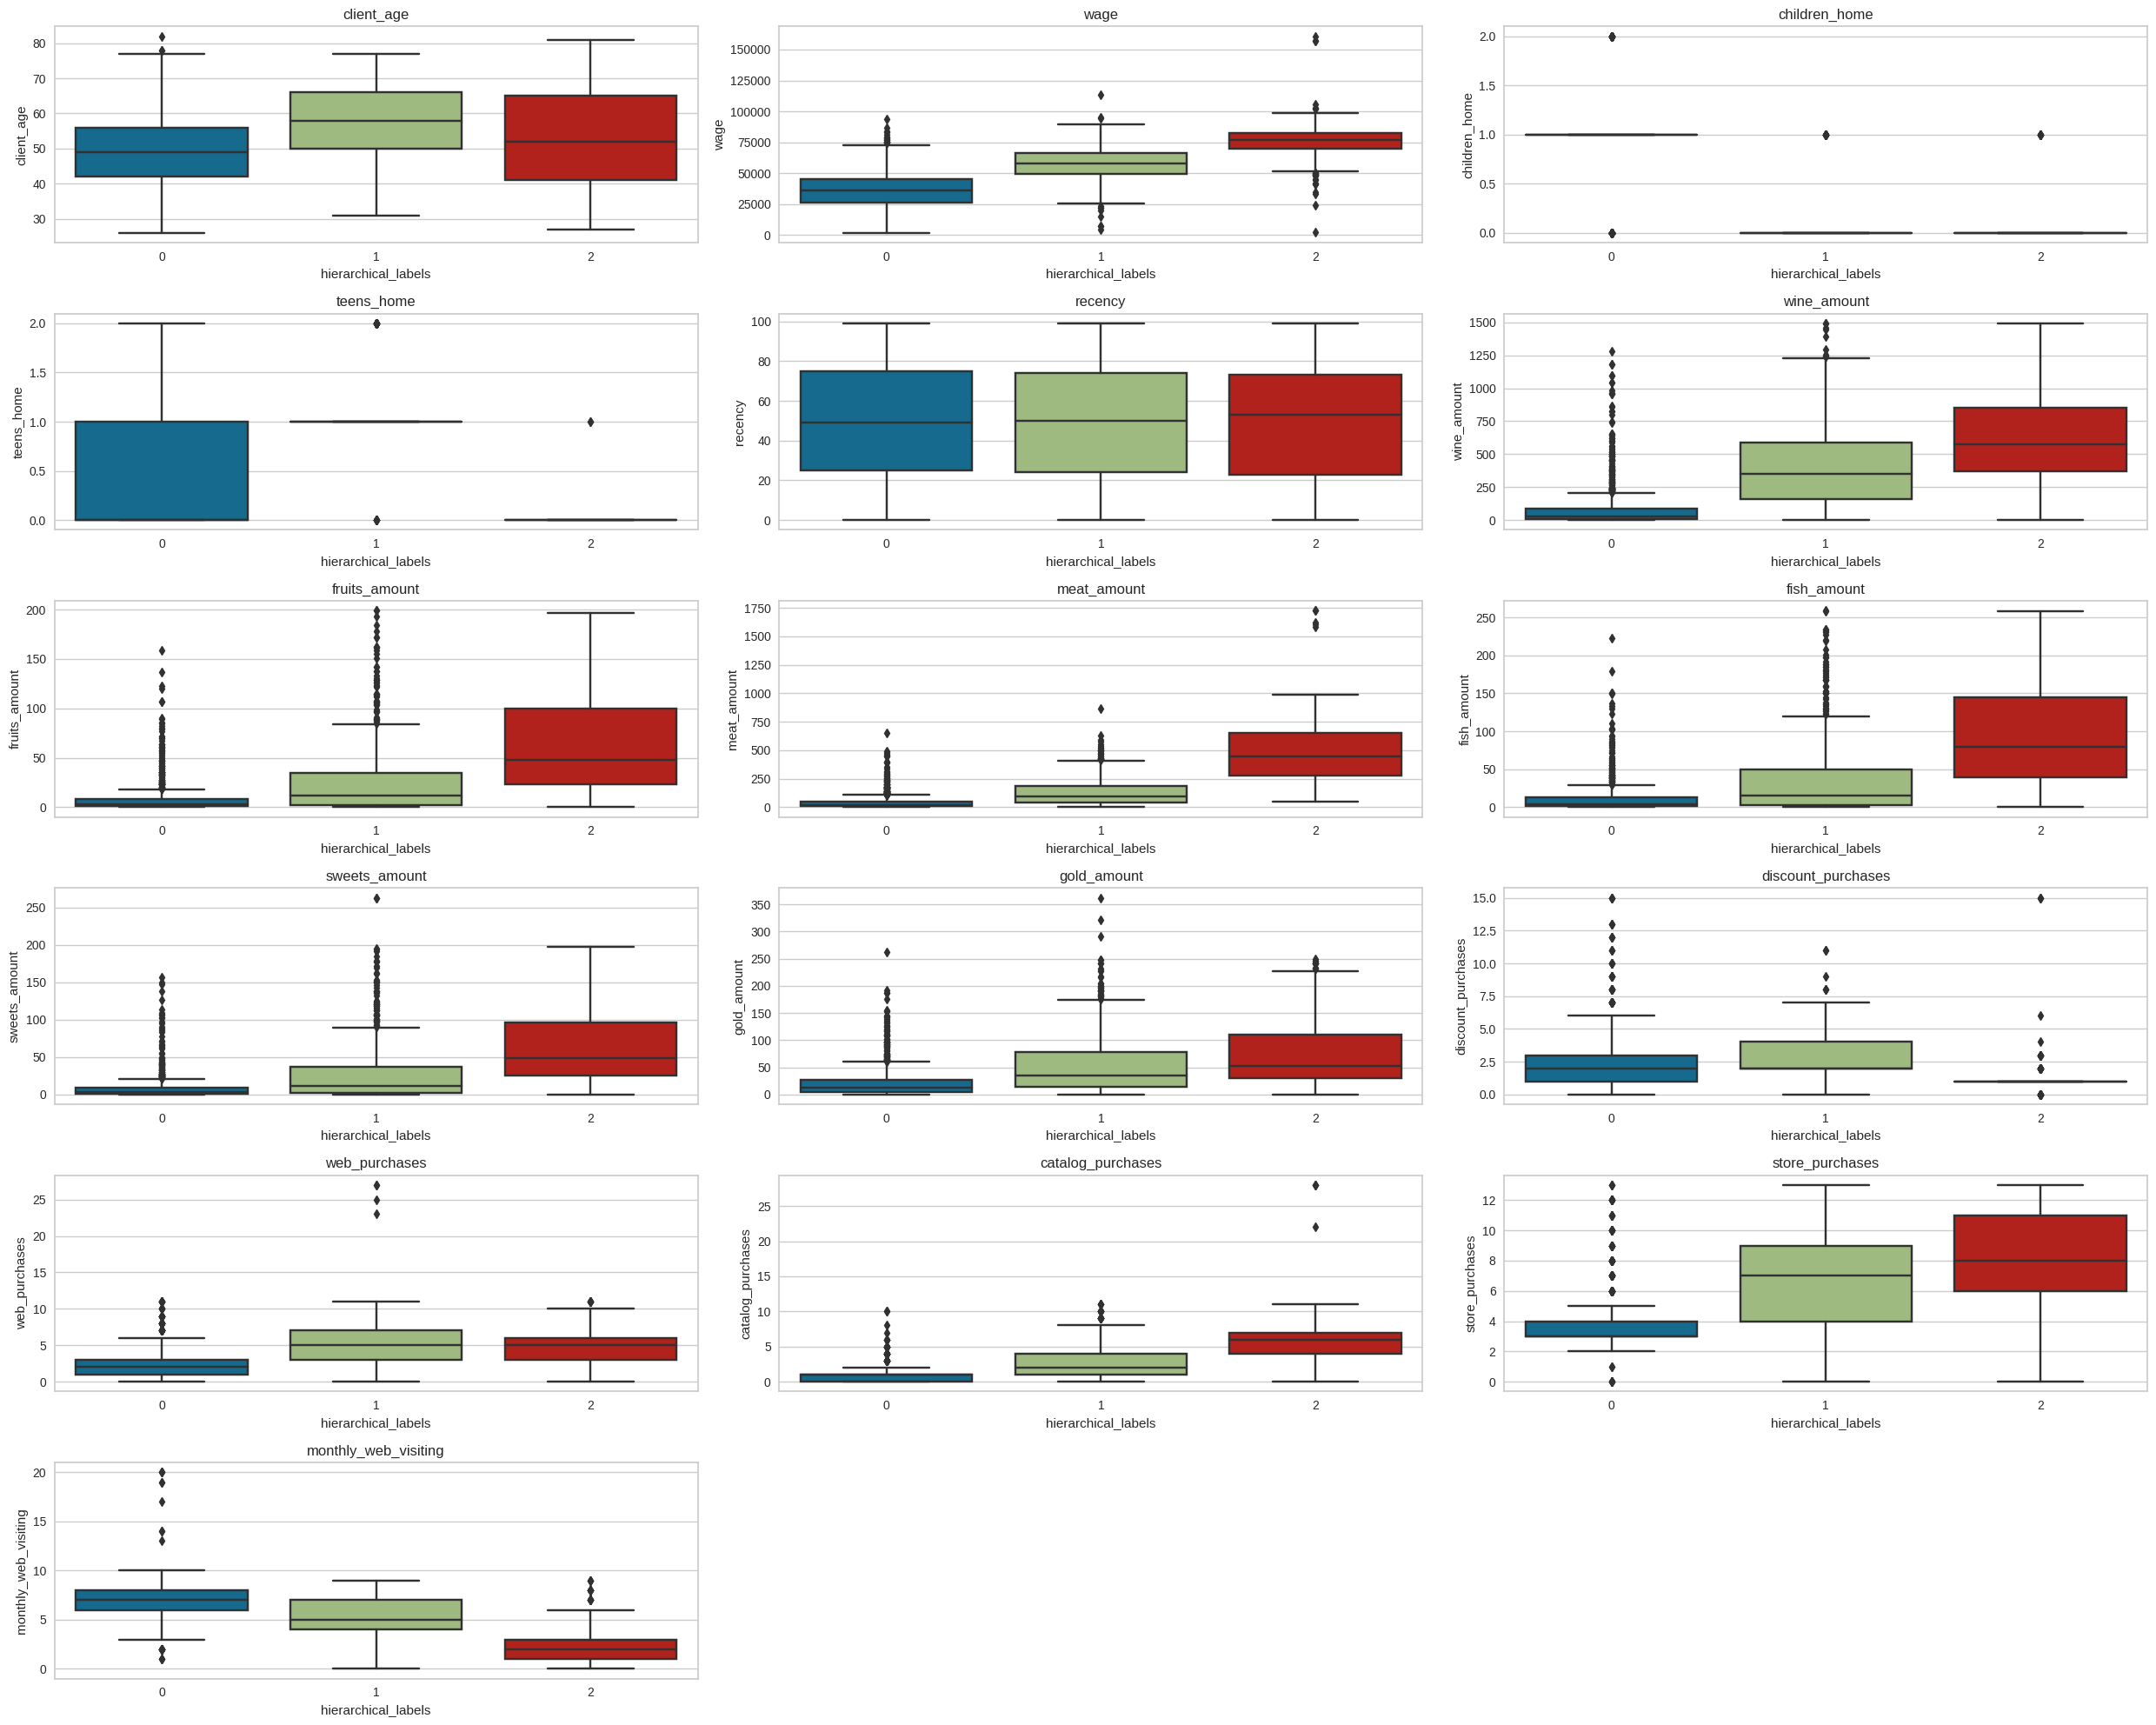

In [66]:
#Calling the function "plot_clusters" 
plot_clusters(cols_clusters, data_with_labels, "hierarchical_labels")

## **Clusters with Gaussian Mixture algorithm**

In [67]:
# Initializing the GaussianMixture algorithm 
gaussian_cluster = GaussianMixture(n_components = 4, random_state = 1)

# Applying it to the  data 
gaussian_cluster.fit(copy_of_scaled_data)

GaussianMixture(n_components=4, random_state=1)

In [68]:
# Adding the label to each cluster in both the scaled and original data set 
copy_of_scaled_data_with_labels["gaussian_labels"] = gaussian_cluster.predict(copy_of_scaled_data)
data_with_labels["gaussian_labels"] = gaussian_cluster.predict(copy_of_scaled_data)

# Checking the  data 
copy_of_scaled_data_with_labels.head()

,client_age,wage,children_home,teens_home,recency,wine_amount,fruits_amount,meat_amount,fish_amount,sweets_amount,gold_amount,discount_purchases,web_purchases,catalog_purchases,store_purchases,monthly_web_visiting,amount_accepted_cmp,kmeans1_labels,hierarchical_labels,gaussian_labels
0,0.464286,0.522433,0.0,0.0,0.0,0.126591,0.522613,0.219710,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,0.2,2,2,1
1,0.625000,0.348023,0.0,0.0,0.0,0.310784,0.025126,0.037101,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,0.4,1,2,1
2,0.678571,0.411993,0.0,0.5,0.0,0.089752,0.055276,0.034203,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0.0,1,1,0
3,0.517857,0.193270,0.5,0.5,0.0,0.006698,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.037037,0.000000,0.153846,0.35,0.0,0,0,0
4,0.125000,0.124119,0.5,0.0,0.0,0.004019,0.080402,0.013913,0.042471,0.000000,0.093923,0.133333,0.111111,0.035714,0.153846,0.35,0.4,0,0,2


In [69]:
# Measuring the amount of data in each of the new clusters 
copy_of_scaled_data_with_labels.gaussian_labels.value_counts()

0    627
3    547
1    537
2    521
Name: gaussian_labels, dtype: int64

In [70]:
# Measuring the silhouette of these clusters 
clusters_gaus = gaussian_cluster.fit_predict(copy_of_scaled_data)
silhouette_gauss = round(silhouette_score(copy_of_scaled_data, clusters_gaus),2)
print(silhouette_gauss)

0.15


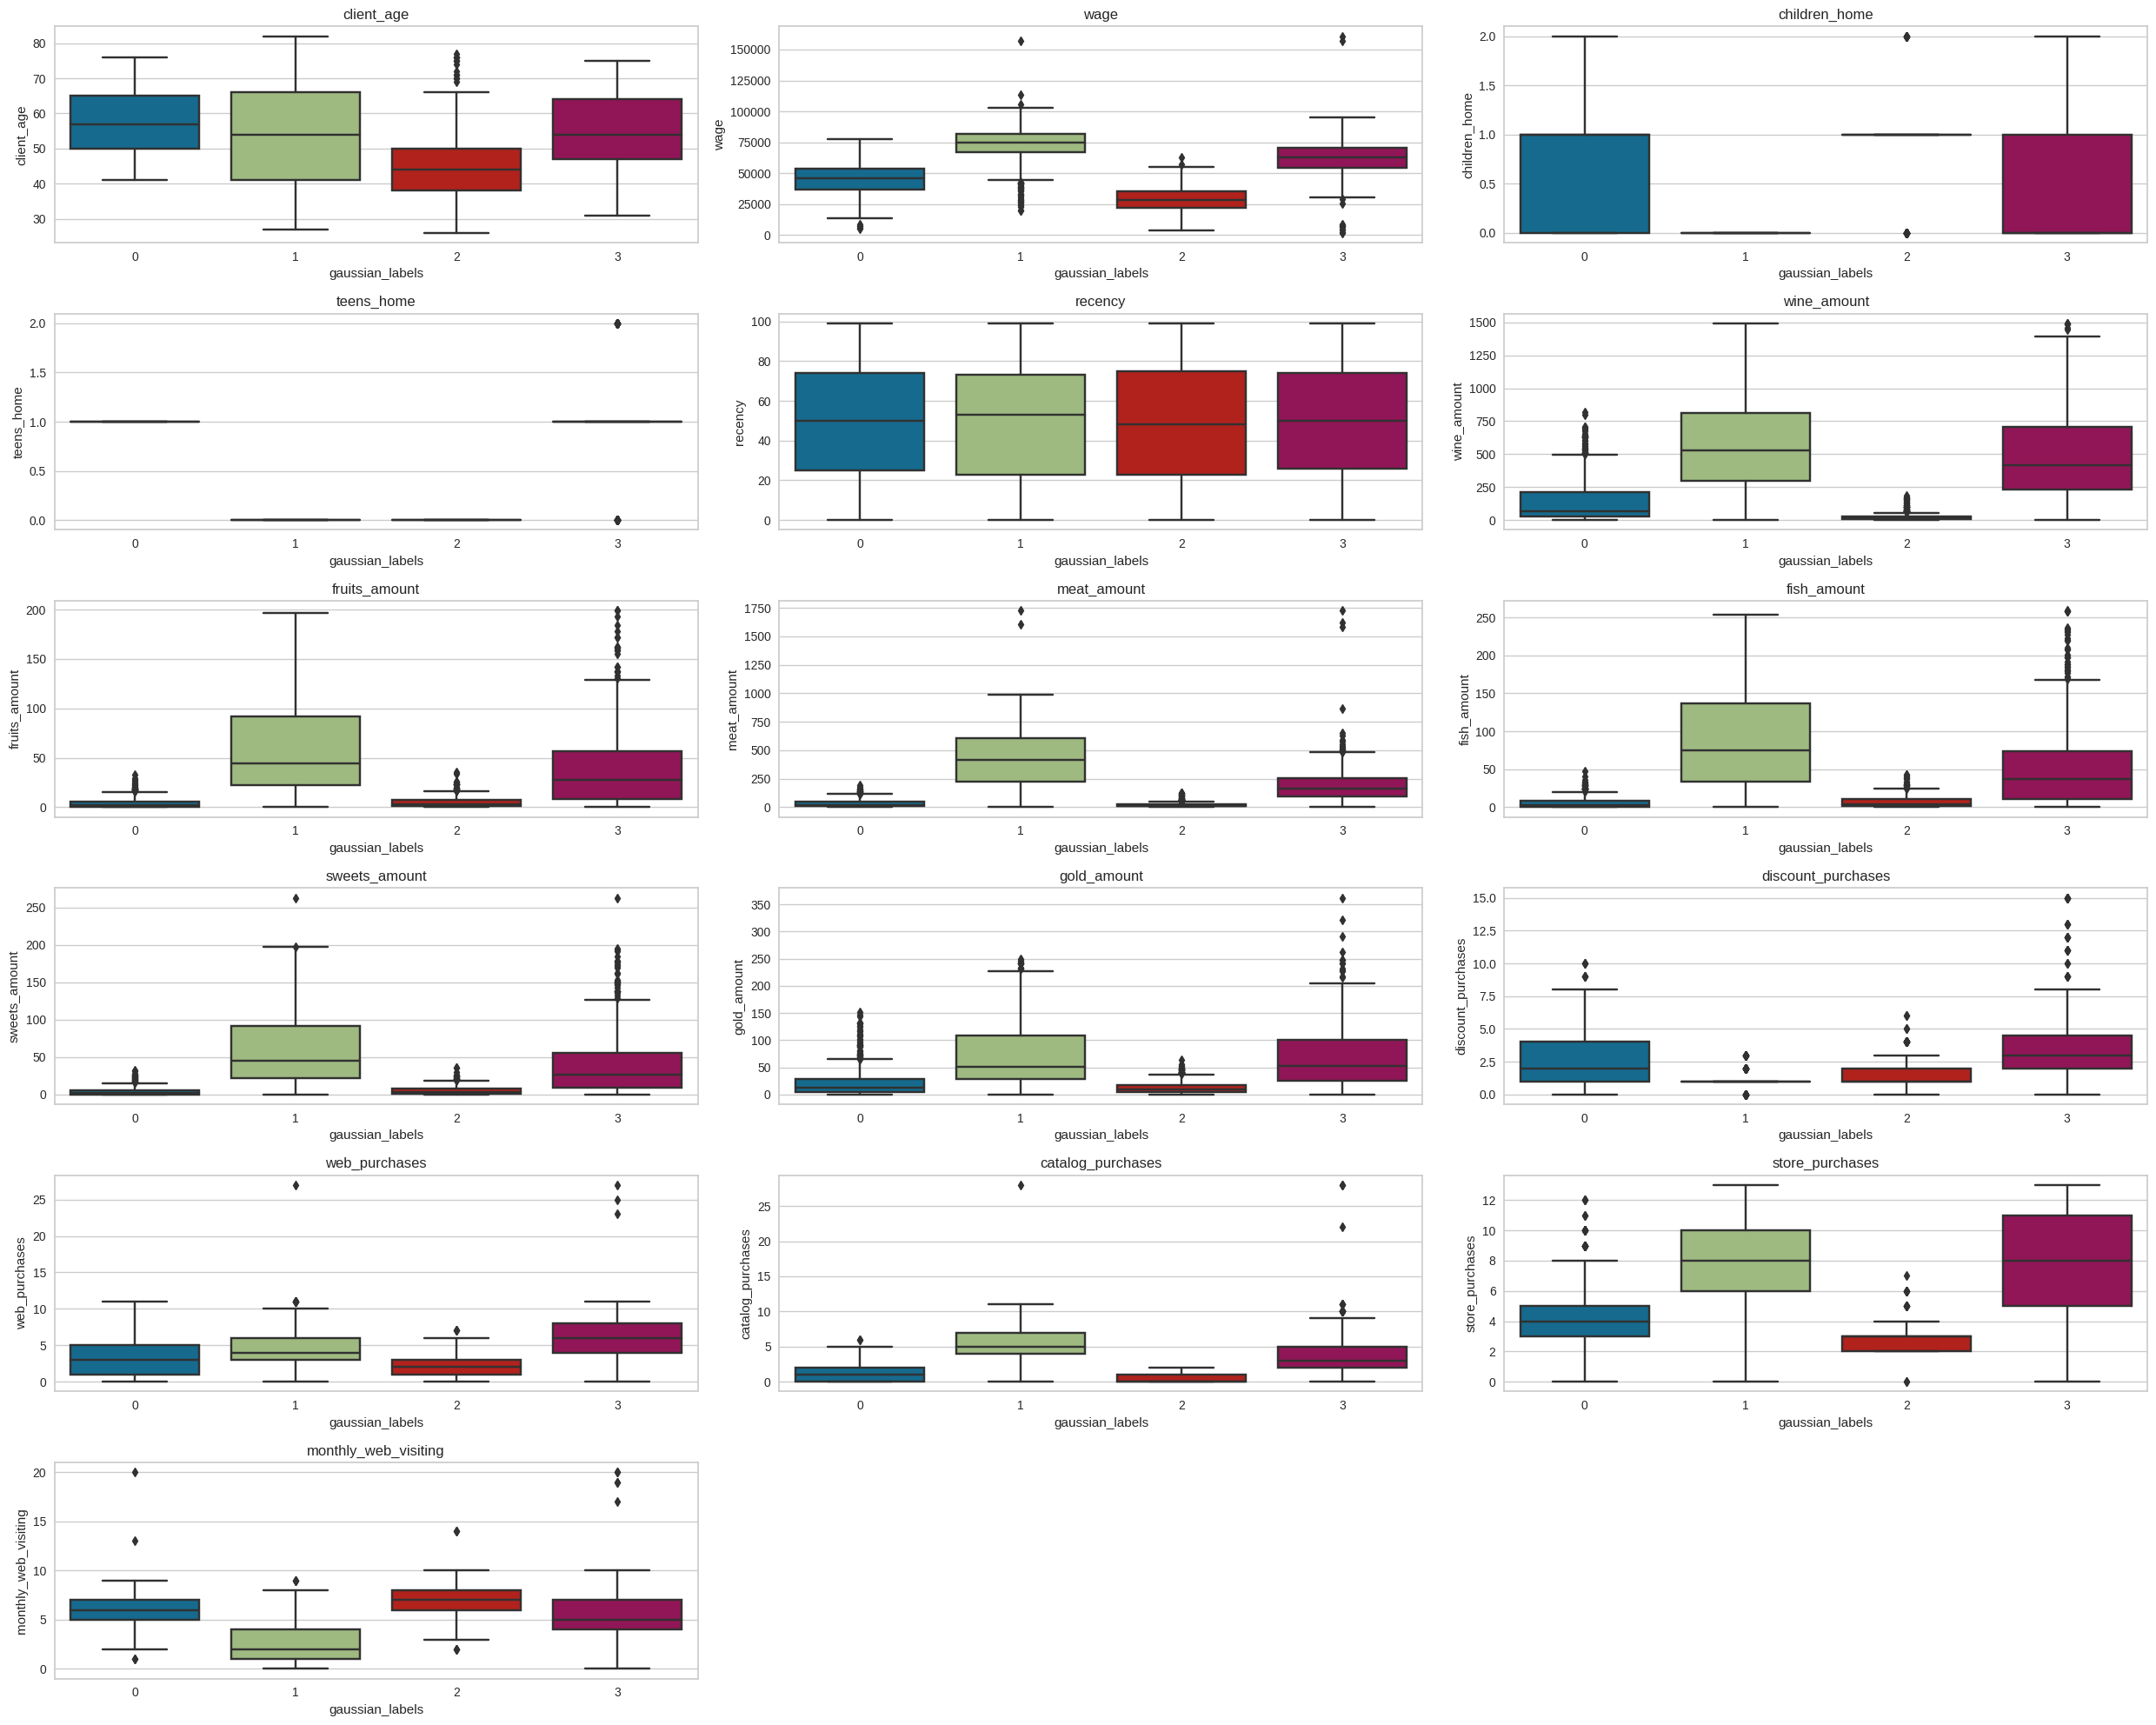

In [71]:
# Calling the "plot_clusters" function 
plot_clusters(cols_clusters, data_with_labels, "gaussian_labels")

## **Comparing cluster performance**

In [72]:
print(pd.DataFrame({"Measure": ["silhouette coefficient"],"kmeans": [silhouette_kmeans], "hierarchical": [hierarchical_silhouette], "Gaussian Mixture": [silhouette_gauss]}))

                  Measure  kmeans  hierarchical  Gaussian Mixture
0  silhouette coefficient    0.21          0.21              0.15


We select the K-means algorithm: 




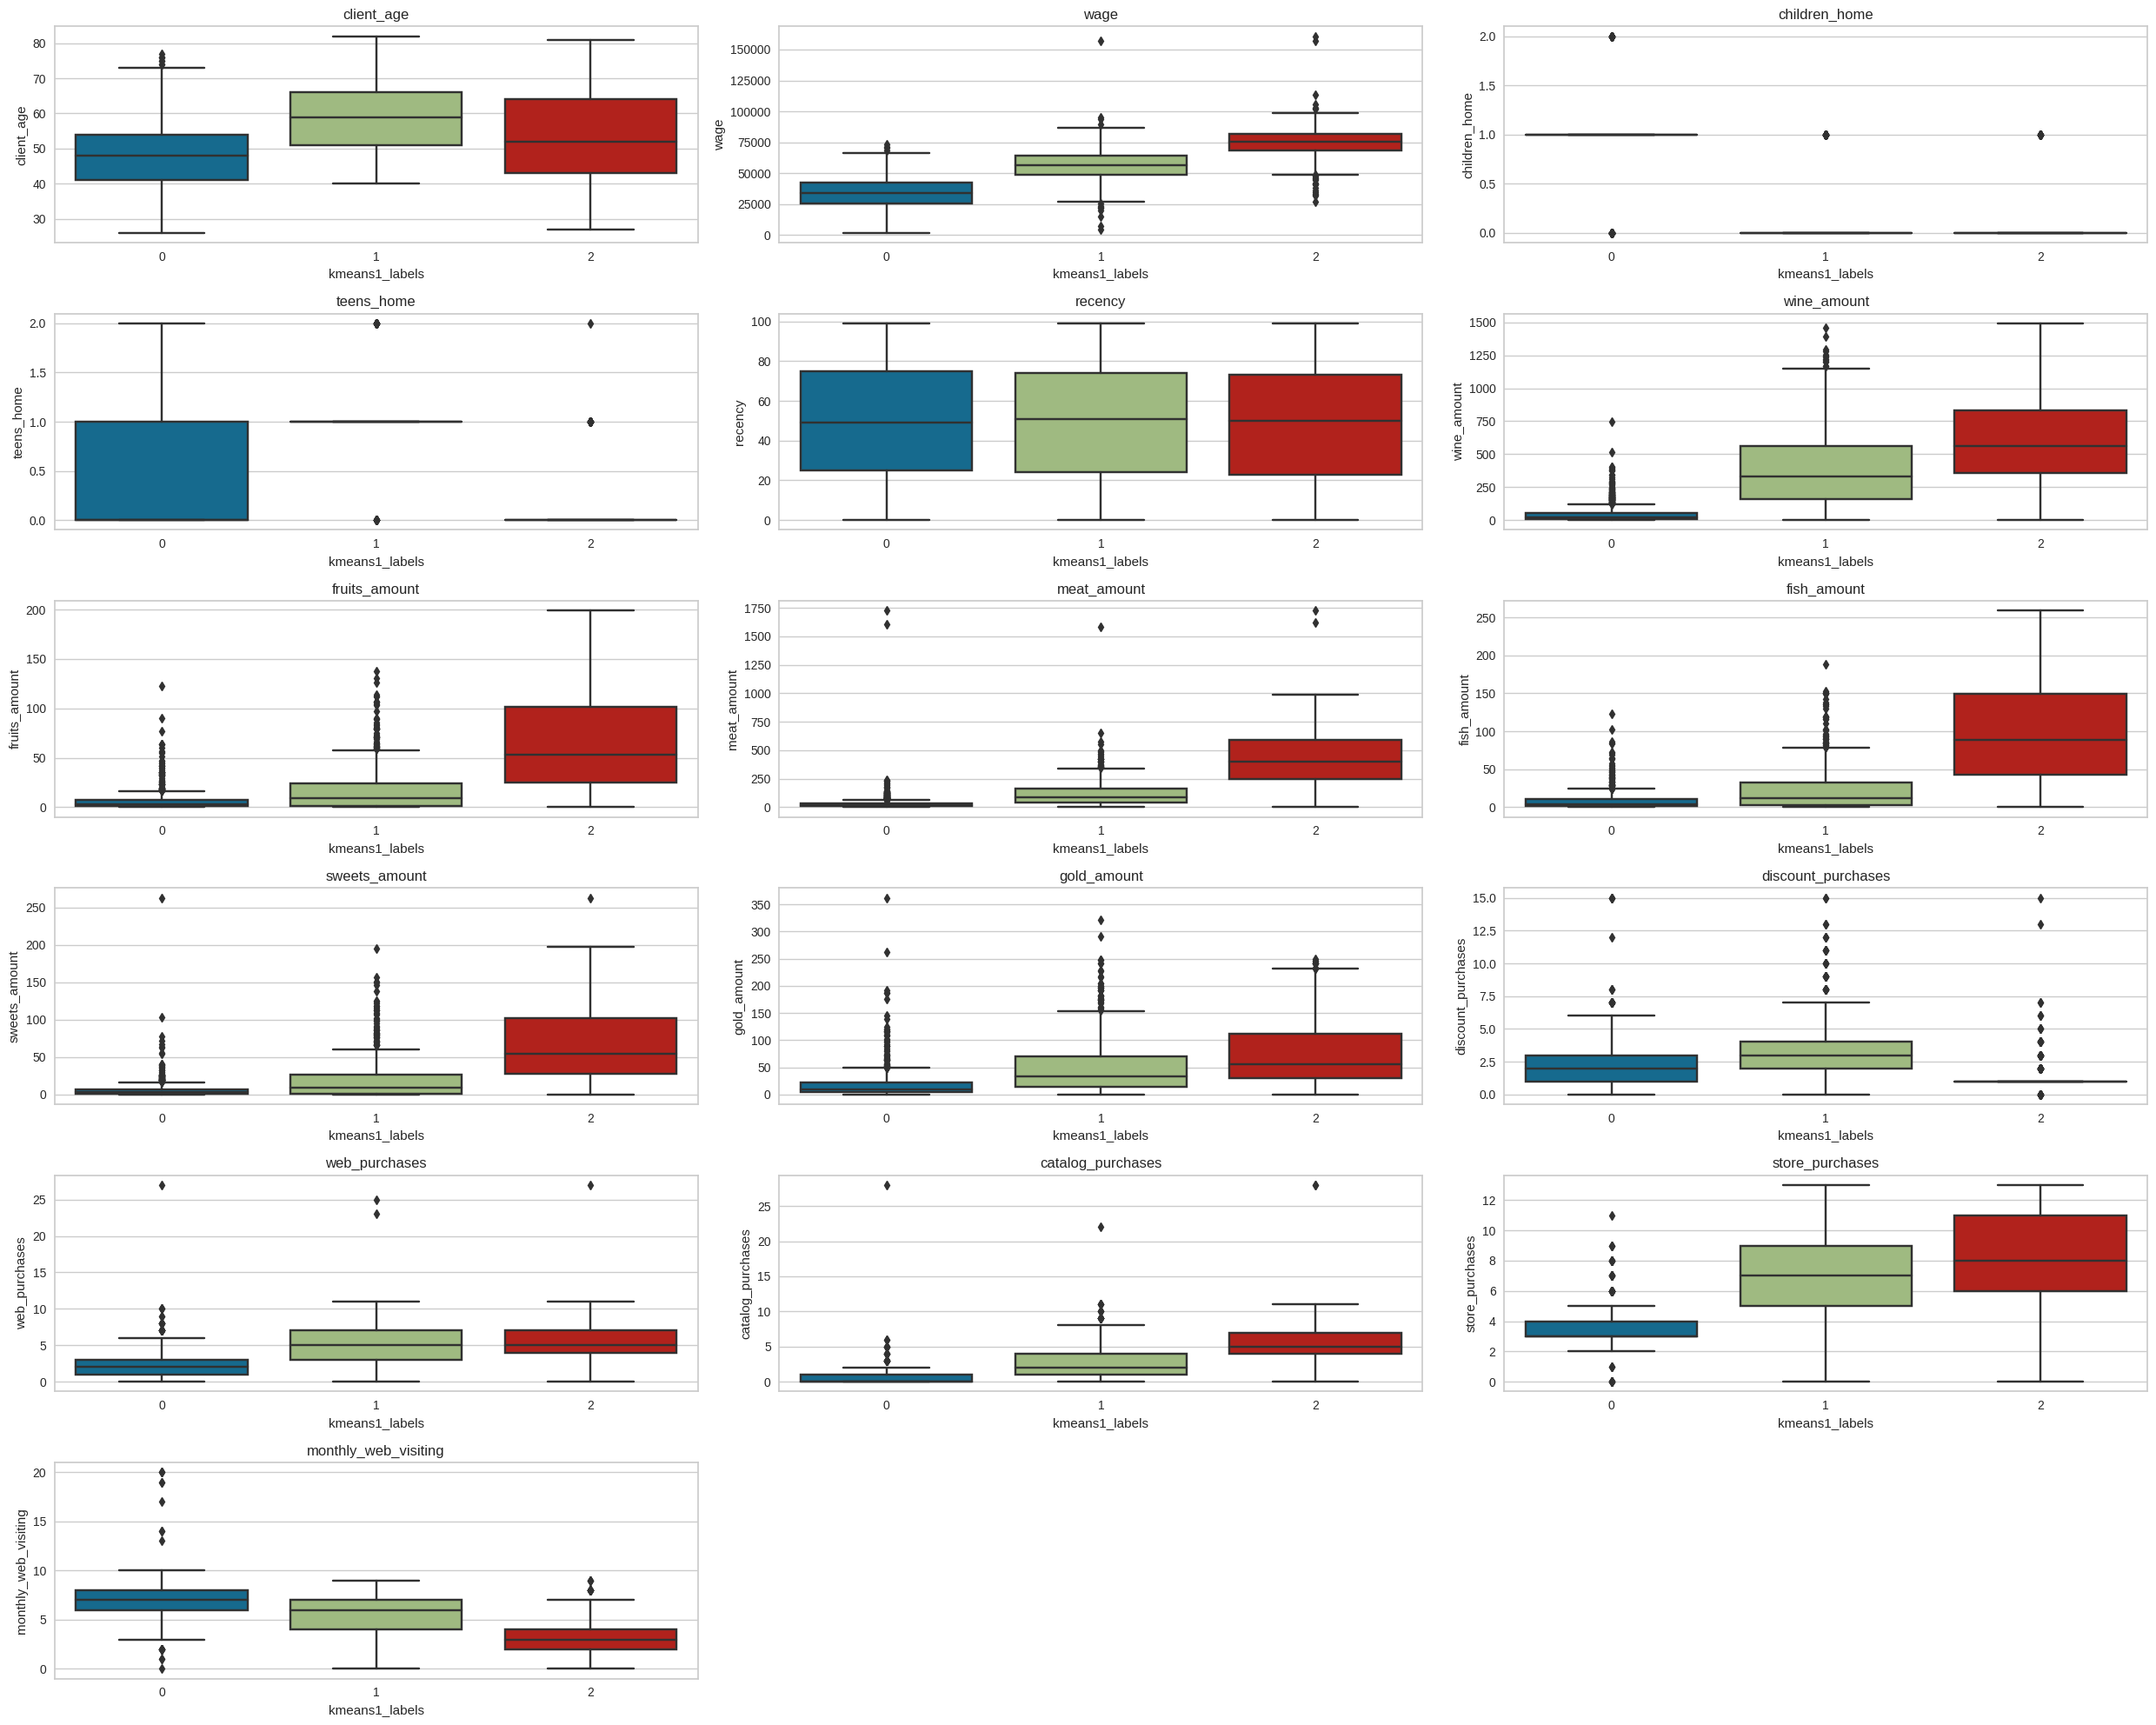

In [73]:
plot_clusters(cols_clusters, data_with_labels, "kmeans1_labels")

In [75]:
# Information from clusters 
media = data_with_labels.groupby("kmeans1_labels").mean()
medias_kmeans = pd.DataFrame(media)
medias_kmeans.index = ["cluster_1", "cluster_2", "cluster_3"]
medias_kmeans[cols_clusters].T

,cluster_1,cluster_2,cluster_3
client_age,48.890526,58.854599,53.297697
wage,33928.037895,56224.274481,74683.095395
children_home,0.921053,0.123145,0.054276
teens_home,0.368421,1.032641,0.141447
recency,49.180000,49.140950,48.927632
wine_amount,47.656842,392.596439,608.582237
fruits_amount,5.928421,18.043027,67.361842
meat_amount,31.252632,118.339763,434.039474
fish_amount,8.031579,23.860534,99.034539
sweets_amount,6.004211,19.642433,68.430921


## Clusters characterization 

 - Cluster 1:


This cluster has the lowest average "client_age" of the 3 (48 years), which is related to the average number of children at home since they have 0.92 kids on average while a minority have adolescents, so they are families with youngsters whose wage is, of the three clusters, the lowest.

Of the three groups, this one spent the least in the different product categories. The products they have spent the most, on average, over the last two years is wine, followed by meat. On the other hand, they have invested the least in fruit and sweets. 

Out of the three clusters, this one visits the store's website the most. On average, they have visited it six times a month during these two years.
In this period, they have made purchases in the store on average six times, while the number of purchases they have made on the web is only 2. When comparing this with web visits, it appears they use the page as a catalog or for price comparisons with other stores; this assumption can be further analyzed to determine the cause. 
Regarding the number of advertising campaigns accepted, they are the least influenced by them; this is another essential point to consider.

- Cluster 2:


Clients in this grouping have the highest average "client_age". Most do not have children, but they have one teenager at home on average. Their spending on the different products analyzed is intermediate compared to the other groups. In the last two years, the most significant amount of their purchases belongs to the wine category, followed by meat, the same behavior present in the other two groups, what changes is the average amount. The product types they consume the least are fruits and sweets, the same as in the other clusters.
On average, they are the ones who have made the most discount purchases in this period and who make the most purchases on the web. They visit the store more than clients in cluster 1 but less than customers in cluster 3. Like the first group,  promotional campaigns do not have a significant effect on them. 

- Cluster 3:


This is a cluster whose "client_age" is between the other two clusters. However, most do not have small children or adolescents, and their income is the highest of the three segments studied. Regarding the amounts allocated to consumer products, it respects the order of the other groups; however, unlike the other two, fish products are in third place, while in clusters 1 and 2, the other has that position.
They have accepted more campaigns on average, since this number is 0.97 on average, and buy more frequently in the physical store (8.51 times on average) and by catalog (on average 5.75 times). But, on the other hand, they  buy the least at a discount of the three clusters and visit the website the least. 
